# 1)- Handeling Missing Values

## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1.1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 1.2 Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 1.3 Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## Examples

In [31]:
import seaborn
import pandas as pd

In [2]:
df = seaborn.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
## checking missing values
df.isnull()

survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False       False   True        False  False  False  
1    False       False  False        False  False  False  
2    False       False   True        False  False  False  
3    False       False  False        False  False  False  
4    False       False   True        False  False  False  
..     ...         ...    ...          ...    ...    ...  
886  False       False   True        False  False  False  
887  False       False  False        False  False  False  
888  False       False   True        False  False  False  
889  False       False  False        False  False  False  
890  False       False   True        False  False  False  

[891 rows x 15 columns]

In [5]:
#checking no of missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#method 1: to delete the rows containing null values
#disadvantage: vast amount of data will be lost
print(df.shape)

(891, 15)


In [10]:
print(df.dropna().shape) #vast amount of data lost

(182, 15)


In [11]:
#method 2: deleting column, is possible in case of deck column(cuz 688 null values) but not in cage of age column. 
df.dropna(axis=1) #inplace =true for permanently changing

survived  pclass     sex  sibsp  parch     fare   class    who  \
0           0       3    male      1      0   7.2500   Third    man   
1           1       1  female      1      0  71.2833   First  woman   
2           1       3  female      0      0   7.9250   Third  woman   
3           1       1  female      1      0  53.1000   First  woman   
4           0       3    male      0      0   8.0500   Third    man   
..        ...     ...     ...    ...    ...      ...     ...    ...   
886         0       2    male      0      0  13.0000  Second    man   
887         1       1  female      0      0  30.0000   First  woman   
888         0       3  female      1      2  23.4500   Third  woman   
889         1       1    male      0      0  30.0000   First    man   
890         0       3    male      0      0   7.7500   Third    man   

     adult_male alive  alone  
0          True    no  False  
1         False   yes  False  
2         False   yes   True  
3         False   yes  False  
4          True    no   True  
..          ...   ...    ...  
886        True    no   True  
887       False   yes   True  
888       False    no  False  
889        True   yes   True  
890        True    no   True  

[891 rows x 11 columns]

## Imputation Missing Values

### 1- Mean Value Imputation: 
Works will when we have a normally distributed data.

<Axes: xlabel='age', ylabel='Count'>

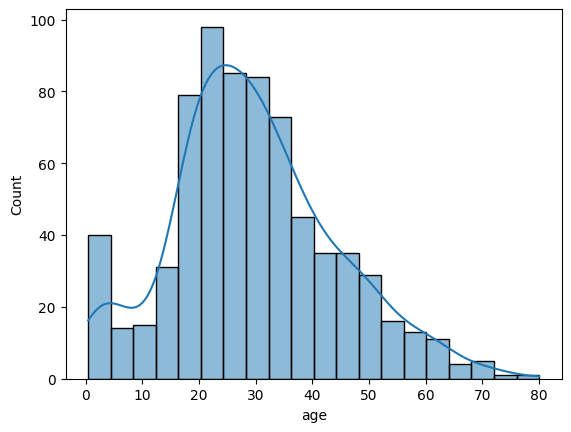

In [14]:
seaborn.histplot(df['age'],kde=True)

In [23]:
##as histplot looks somewhat like normal distribution therefore filling na with mean
df['Age_mean']=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']]

Age_mean   age
0    22.000000  22.0
1    38.000000  38.0
2    26.000000  26.0
3    35.000000  35.0
4    35.000000  35.0
..         ...   ...
886  27.000000  27.0
887  19.000000  19.0
888  29.699118   NaN
889  26.000000  26.0
890  32.000000  32.0

[891 rows x 2 columns]

### 2- Median value imputation
works well if we have outliers in the dataset.

In [35]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','Age_mean','age']]

Age_median   Age_mean   age
0          22.0  22.000000  22.0
1          38.0  38.000000  38.0
2          26.0  26.000000  26.0
3          35.0  35.000000  35.0
4          35.0  35.000000  35.0
..          ...        ...   ...
886        27.0  27.000000  27.0
887        19.0  19.000000  19.0
888        28.0  29.699118   NaN
889        26.0  26.000000  26.0
890        32.0  32.000000  32.0

[891 rows x 3 columns]

### 3- Mode Implementation Techniques
Work for **categorical veriables**

In [53]:
df['embarked_mode']=df['embarked'].fillna(df['embarked'].mode()[0])
df[df['embarked'].isnull()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  Age_mean  Age_median  \
61   woman       False    B         NaN   yes   True      38.0        38.0   
829  woman       False    B         NaN   yes   True      62.0        62.0   

    embarked_mode  
61              S  
829             S

# -------------------------------------------------------------------------------------------------------------

# 2)-Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling
3. SMOTE

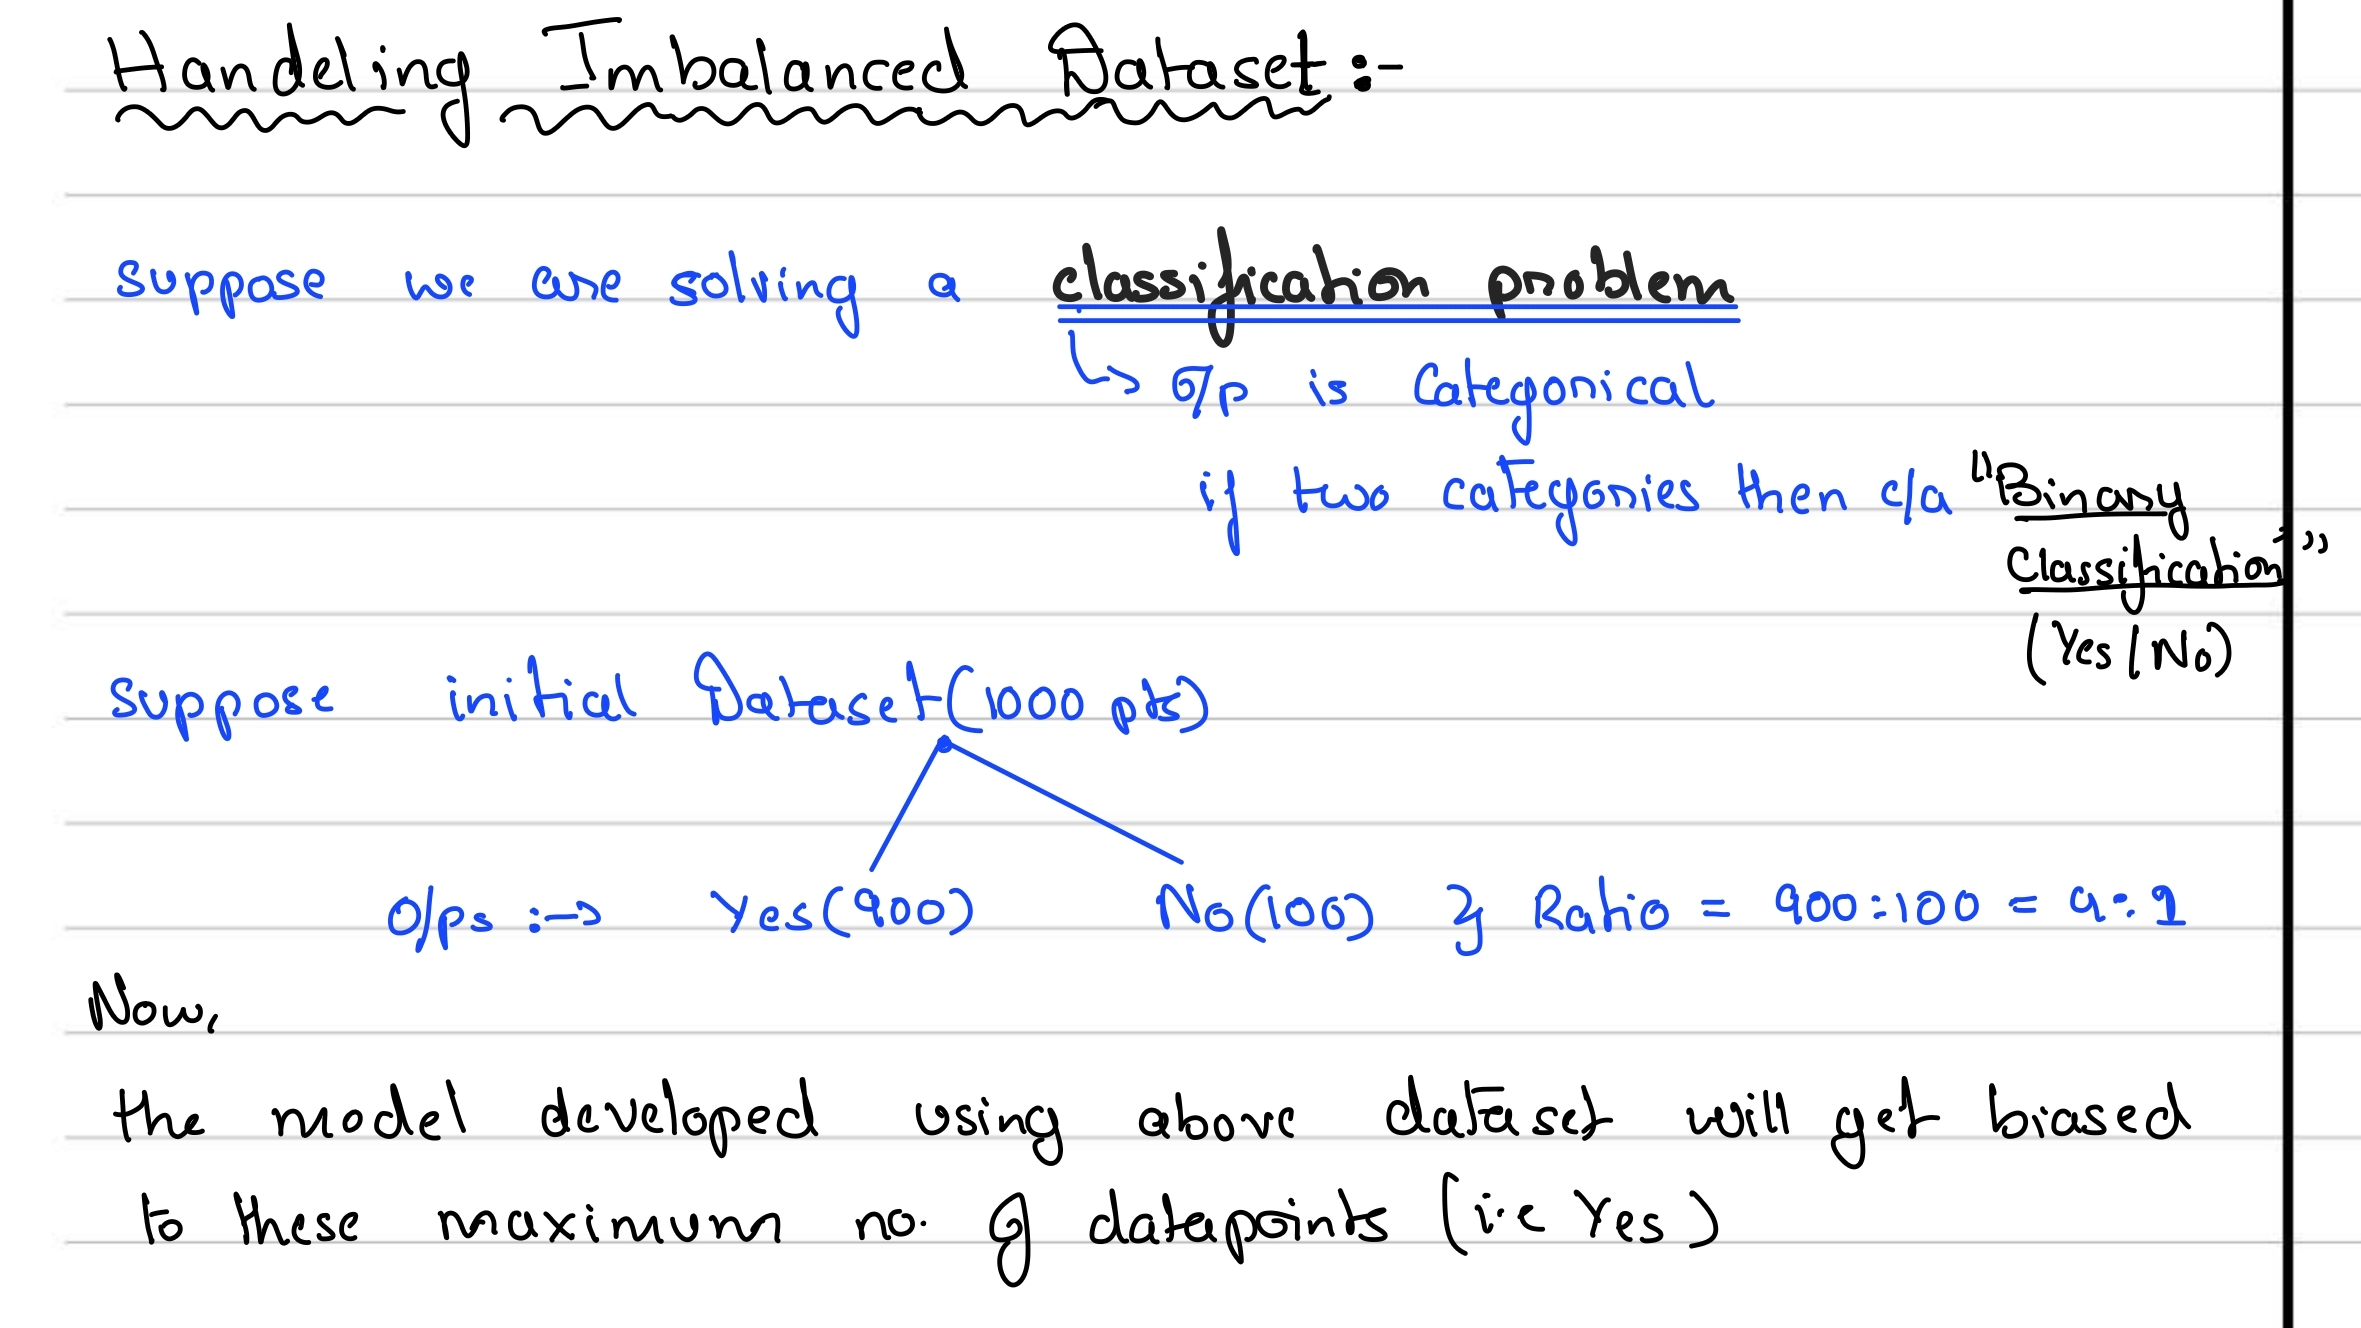

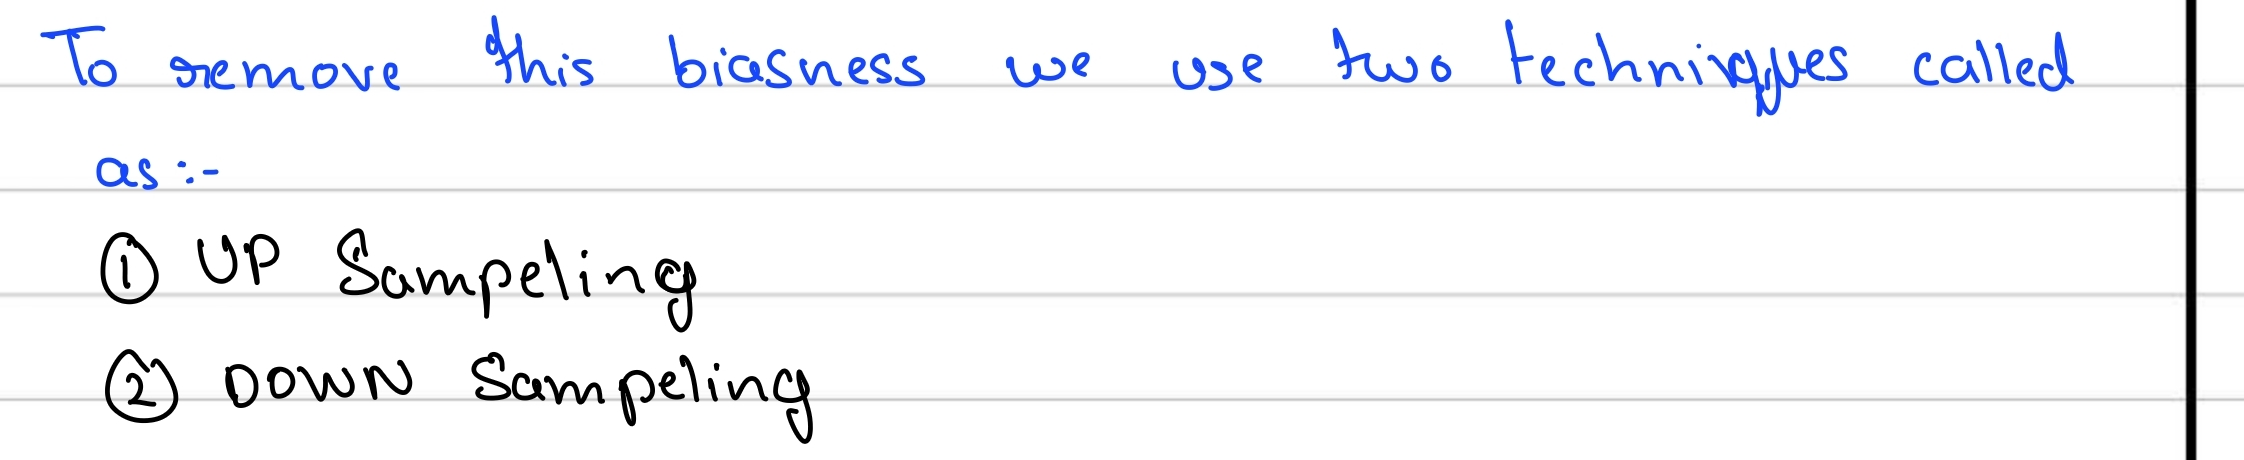

In [3]:
import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(123)

#creating dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio) #900 data point in class 0
n_class_1 = n_samples-n_class_0 #100 datapoints in class 1

In [4]:
#creating dataframe with imbalanced dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0]*n_class_0
})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1]*n_class_1
})

#now combining above dataframes
df = pd.concat([class_0,class_1]).reset_index(drop=True)
print(df.head())
print(df.tail())
print(df['target'].value_counts())

   feature_1  feature_2  target
0  -1.085631   0.551302       0
1   0.997345   0.419589       0
2   0.282978   1.815652       0
3  -1.506295  -0.252750       0
4  -0.578600  -0.292004       0
     feature_1  feature_2  target
995   1.376371   2.845701       1
996   2.239810   0.880077       1
997   1.131760   1.640703       1
998   2.902006   0.390305       1
999   2.697490   2.013570       1
target
0    900
1    100
Name: count, dtype: int64


## 2.1)- UP Sampeling
in case of we are going to increase the no of minority values i.e 1

In [5]:
#UP Sampeling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [8]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
         replace=True, #sample with replacement
        n_samples=len(df_majority),
        random_state=42)
print(df_minority_upsampled.shape)

#concatinating the new upsampled dataset
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled['target'].value_counts()

(900, 3)


target
0    900
1    900
Name: count, dtype: int64

## 2.2)- DOWN Sampeling

In [11]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

df_majority_downsampled = resample(df_majority,
         replace=False, #becausee we need to reduce datapoints
        n_samples=len(df_minority),
        random_state=42)

print(df_majority_downsampled.shape)

#concatinating 
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

print(df_downsampled.target.value_counts())

#downsampeling is bad cuz we are loosing data points

(100, 3)
target
1    100
0    100
Name: count, dtype: int64


## 2.3)- SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.
using library: imblearn
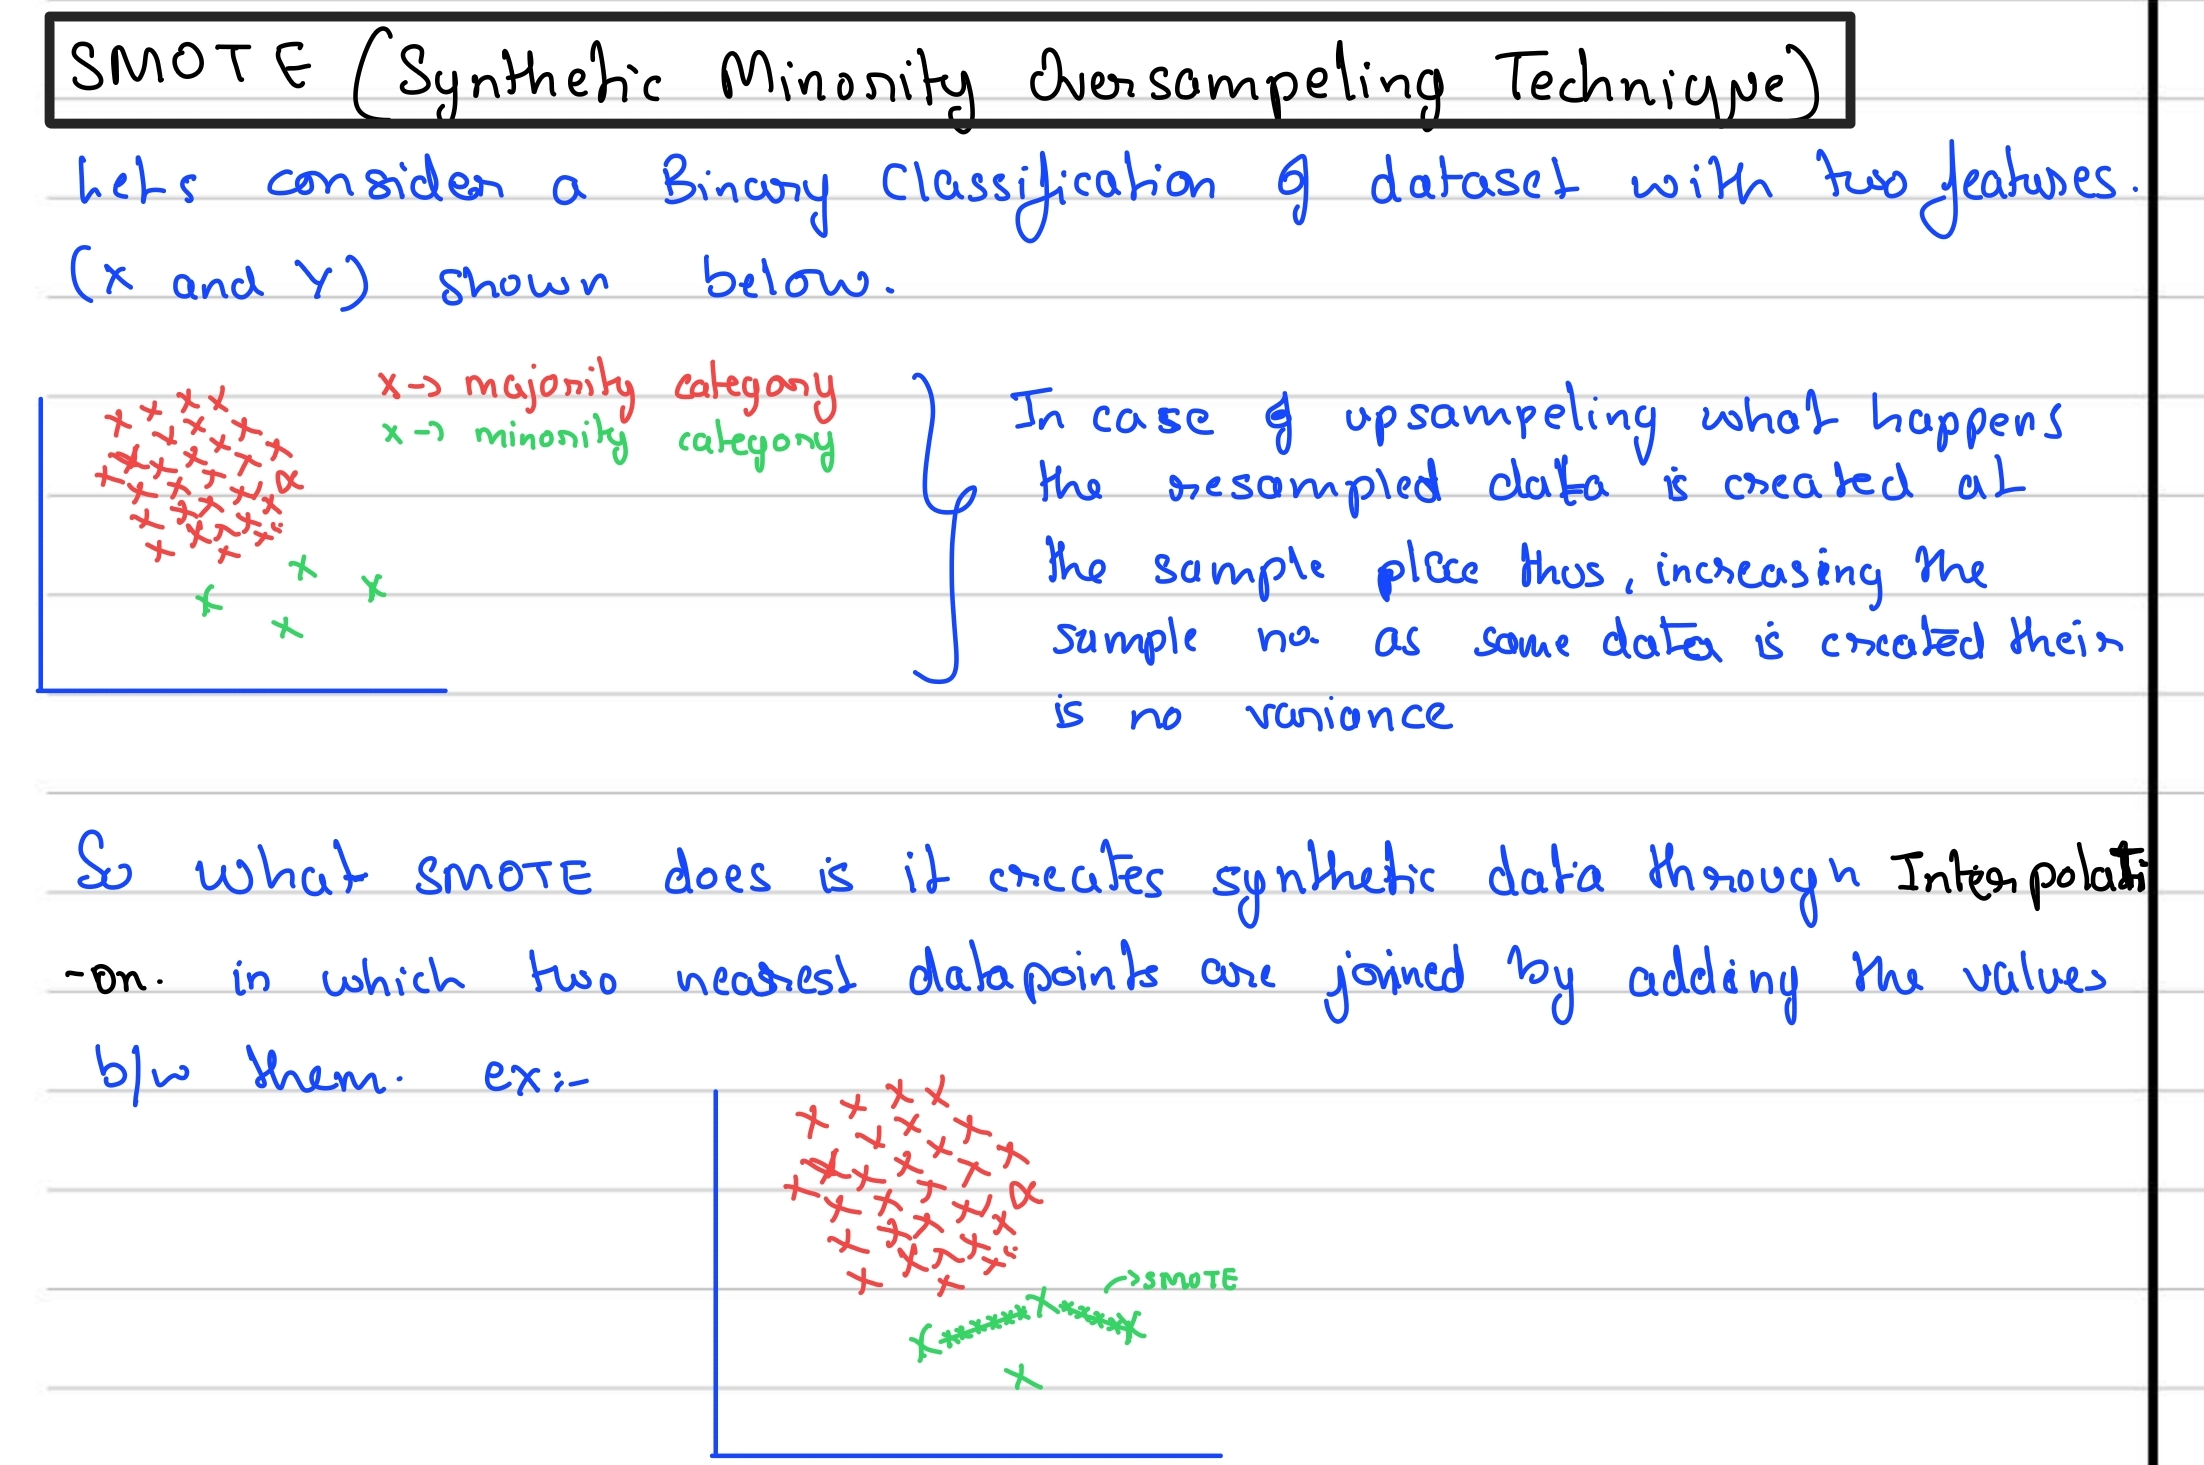

In [26]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,
                   n_features=2,
                   n_redundant=0,
                   n_clusters_per_class=1,
                   weights=[0.90],
                   random_state=12)
# creating dataframes to visualize
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
#concatinating 
final_df = pd.concat([df1,df2],axis=1)

#counting categorical data
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

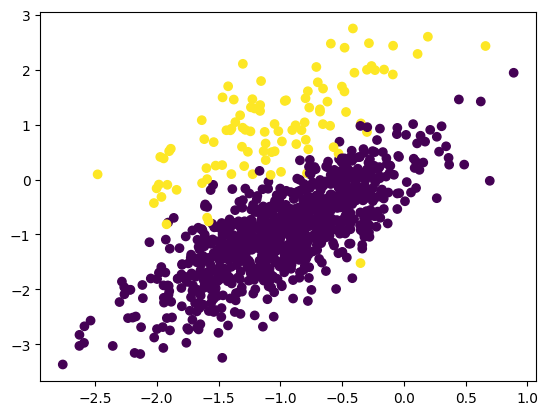

In [34]:
import matplotlib.pyplot as plt
plt.scatter(final_df.f1,final_df['f2'],c=final_df['target'])

(1800, 2)
(1800,)
no. of zeros= 900


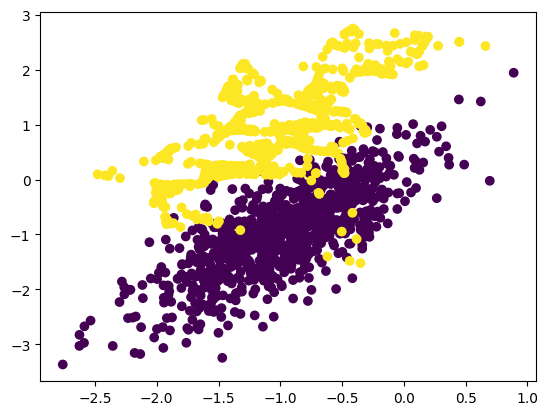

In [58]:
from imblearn.over_sampling import SMOTE

##applying SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df.target)
print(x.shape)
print(y.shape)
print(f"no. of zeros= {oversampled_df[oversampled_df['target']==0][['target']].count()[0]}")

# creating dataframes to visualize
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
#concatinating 
oversampled_df = pd.concat([df1,df2],axis=1)  
plt.scatter(oversampled_df.f1,oversampled_df.f2,c=oversampled_df.target)

In [56]:
oversampled_df[oversampled_df['target']==0][['target']].count()[0]

900

# -------------------------------------------------------------------------------------------------------------

# 3)- Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## 3.1- Linear  Interpolation

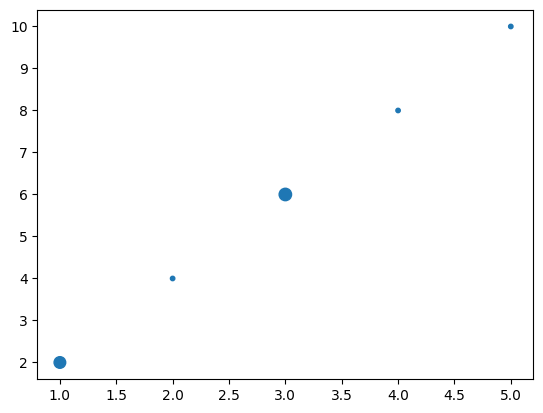

In [67]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

#sizes =10* np.random.randint(1,10,5)
plt.scatter(x,y,#s=sizes)

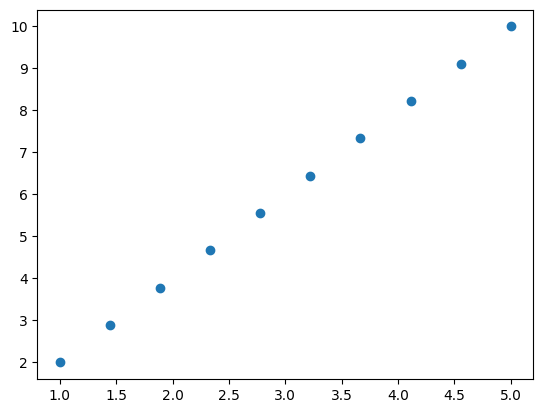

In [72]:
#now performing Linear Interpolation and filing the data b/w points

x_new = np.linspace(1,5,10) #create 10 evenly spaced nos. between 1 to 5

#creating y interpolation points using x_new
y_interp = np.interp(x_new,x,y) #One-dimensional linear interpolation for monotonically increasing sample points.

#plotting
plt.scatter(x_new,y_interp)

In [69]:
np.linspace(1,5,10) 

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

## 3.2- Cubic Interpolation With Scipy
curved graph
using: scipy.interpolate.interp1d

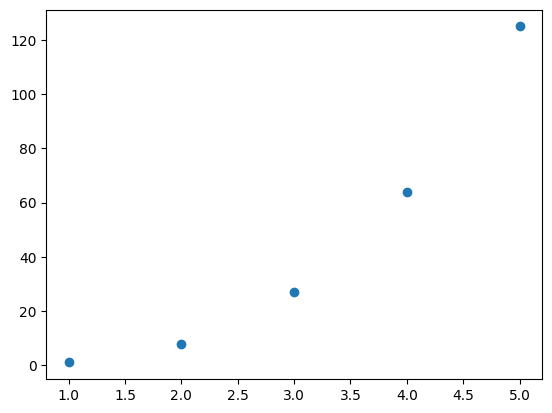

In [73]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

plt.scatter(x,y)

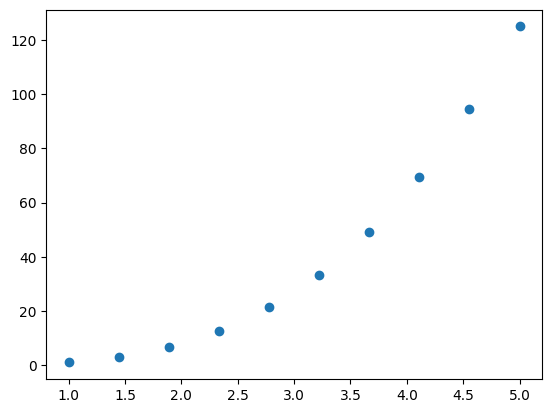

In [75]:
## Now interpolating
from scipy.interpolate import interp1d

## creating a cubic interpolation function 
f = interp1d(x,y,kind='cubic')

## interpolateing the data
x_new = np.linspace(1,5,10)
y_interp = f(x_new)

##plotting 
plt.scatter(x_new,y_interp)

## 3.3- Polynomial Interpolation

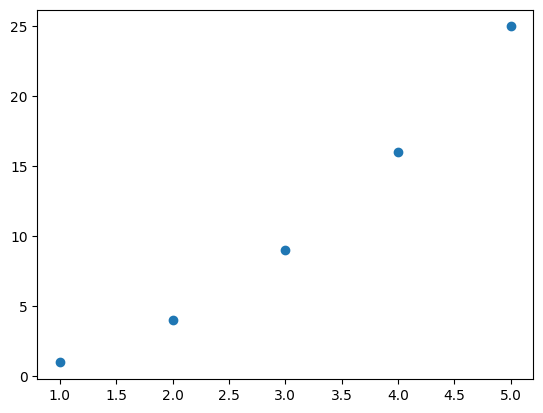

In [78]:
#creating sample data
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

plt.scatter(x,y)

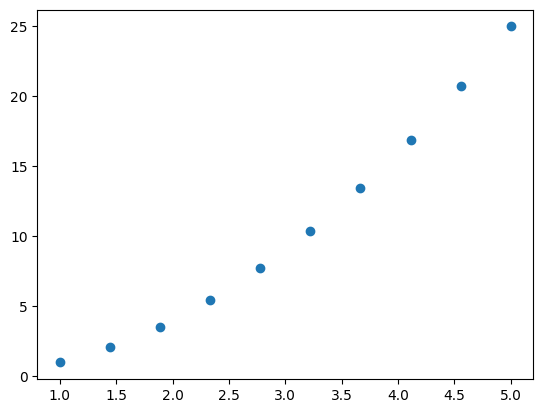

In [81]:
#intepolating the data using numpy
p = np.polyfit(x,y,2) #2-degree of polynomial

x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)
plt.scatter(x_new,y_interp)

# -------------------------------------------------------------------------------------------------------------

# 4)- Percentile & Quartiles
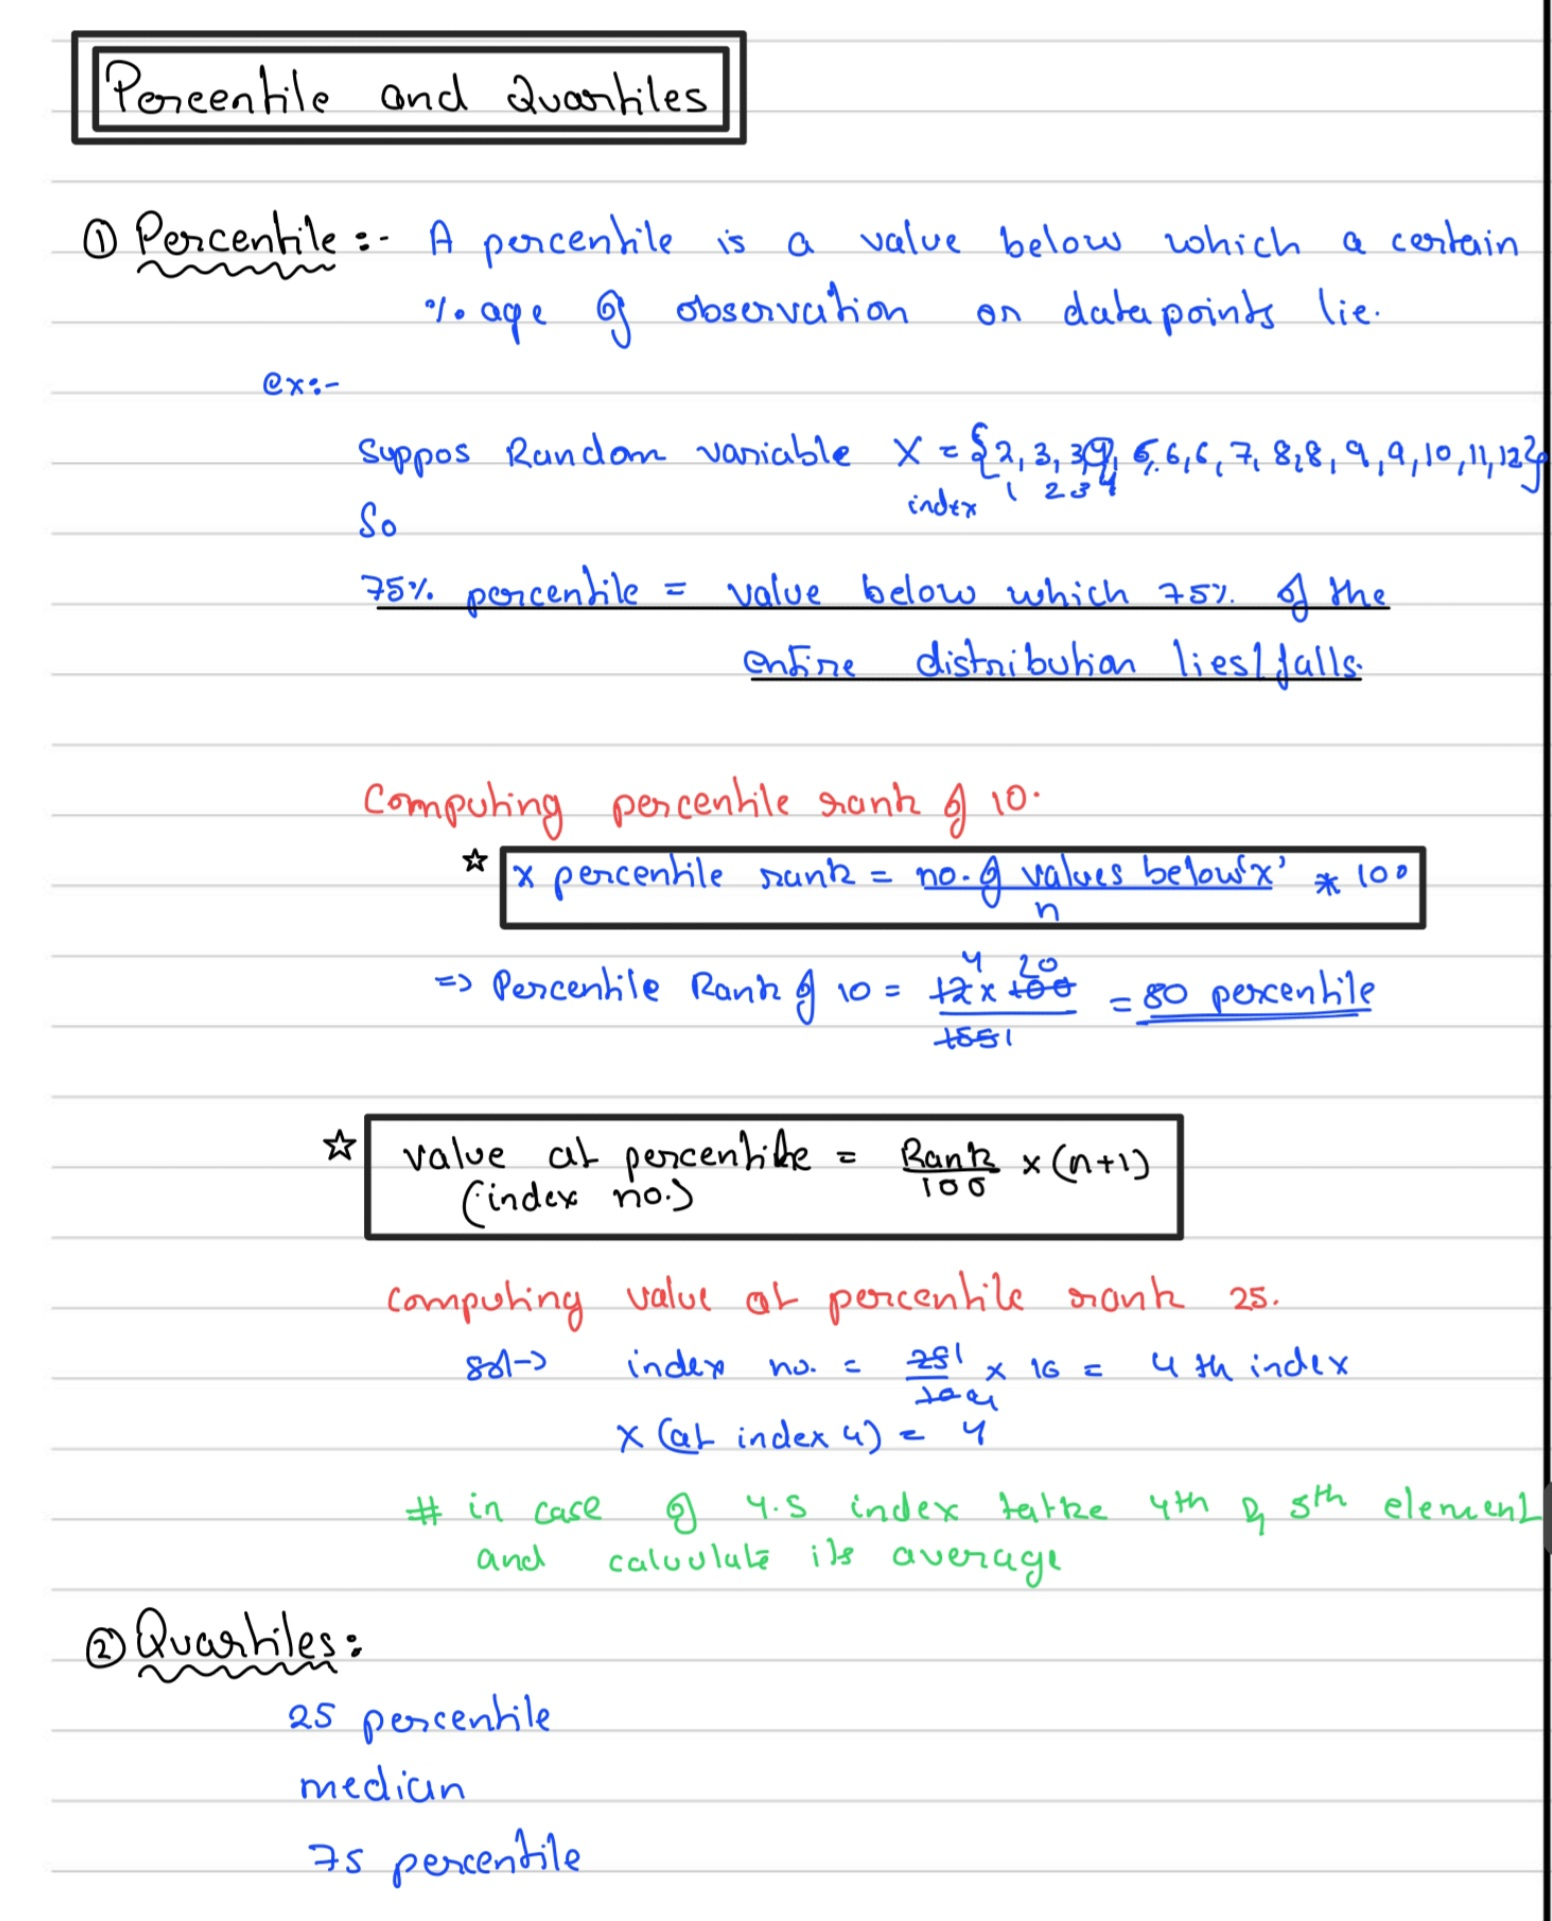

# -------------------------------------------------------------------------------------------------------------

# 5)- 5 Number Summary and Boxpllot
- To find outlliers
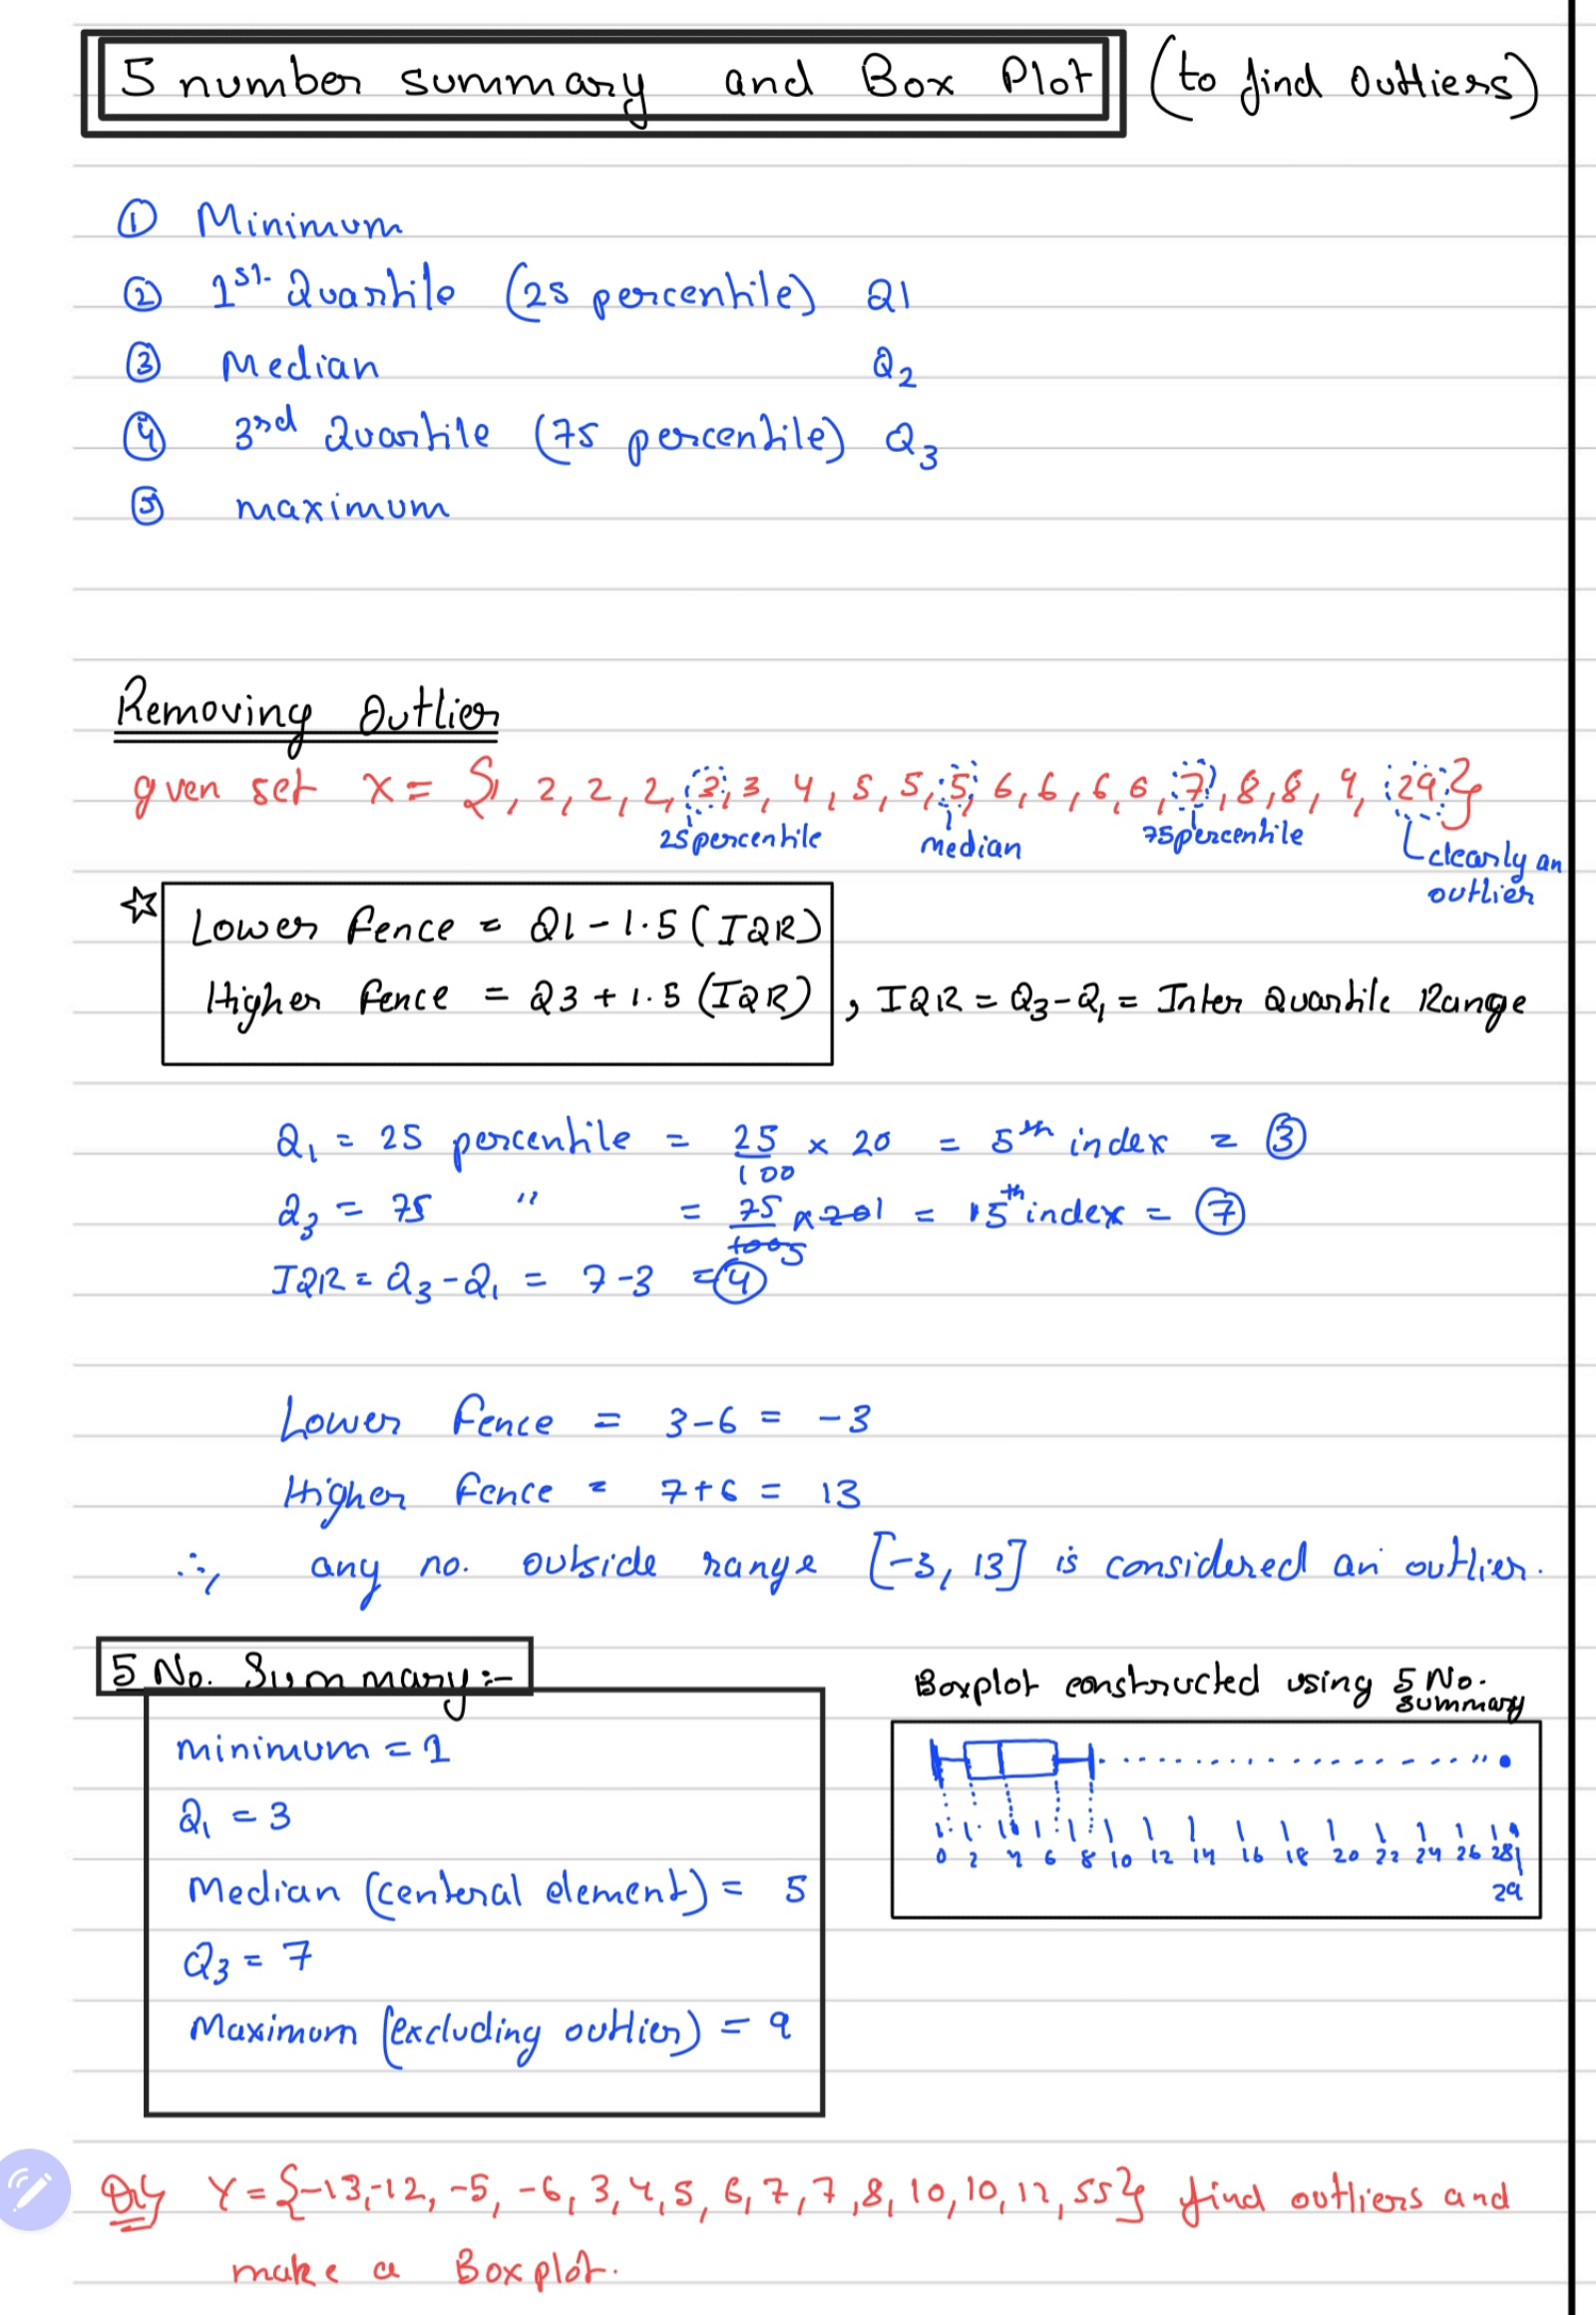

## Handeling Outliers

In [7]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])
print(f"minimun= {minimum},\n1st quartile= {Q1},\nmedian= {median},\n3rd quartile= {Q3},\nmaximum= {maximum}")

minimun= 32.0,
1st quartile= 54.0,
median= 67.0,
3rd quartile= 89.0,
maximum= 99.0


In [8]:
IQR = Q3-Q1
print(IQR)

35.0


In [9]:
#calculating lower fence and higher fence
lower_fence = Q1-(1.5*IQR)
higher_fence = Q3+(1.5*IQR)
print(f"[{lower_fence},{higher_fence}]")

[1.5,141.5]


<Axes: >

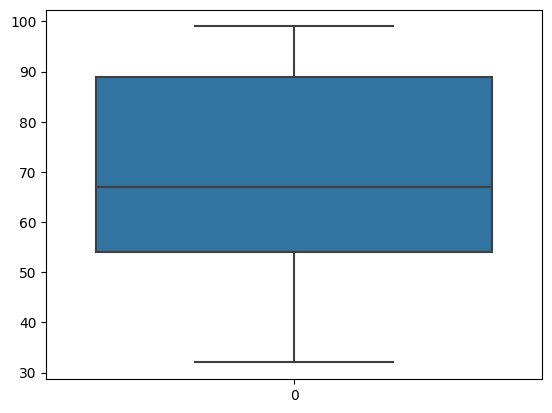

In [10]:
#creating boxplot
import seaborn as sns
sns.boxplot(lst_marks)

<Axes: >

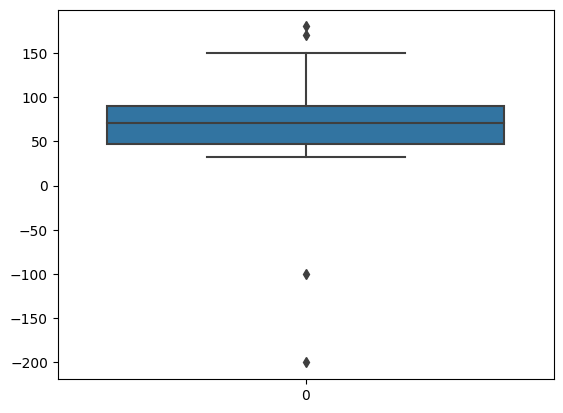

In [11]:
#adding outliers
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]
sns.boxplot(lst_marks)

###### <a href='../Assignments/17_March_Feature_Engineering_1.ipynb'>Assignment-1</a>

# -------------------------------------------------------------------------------------------------------------

# 6)- Feature Extraction:
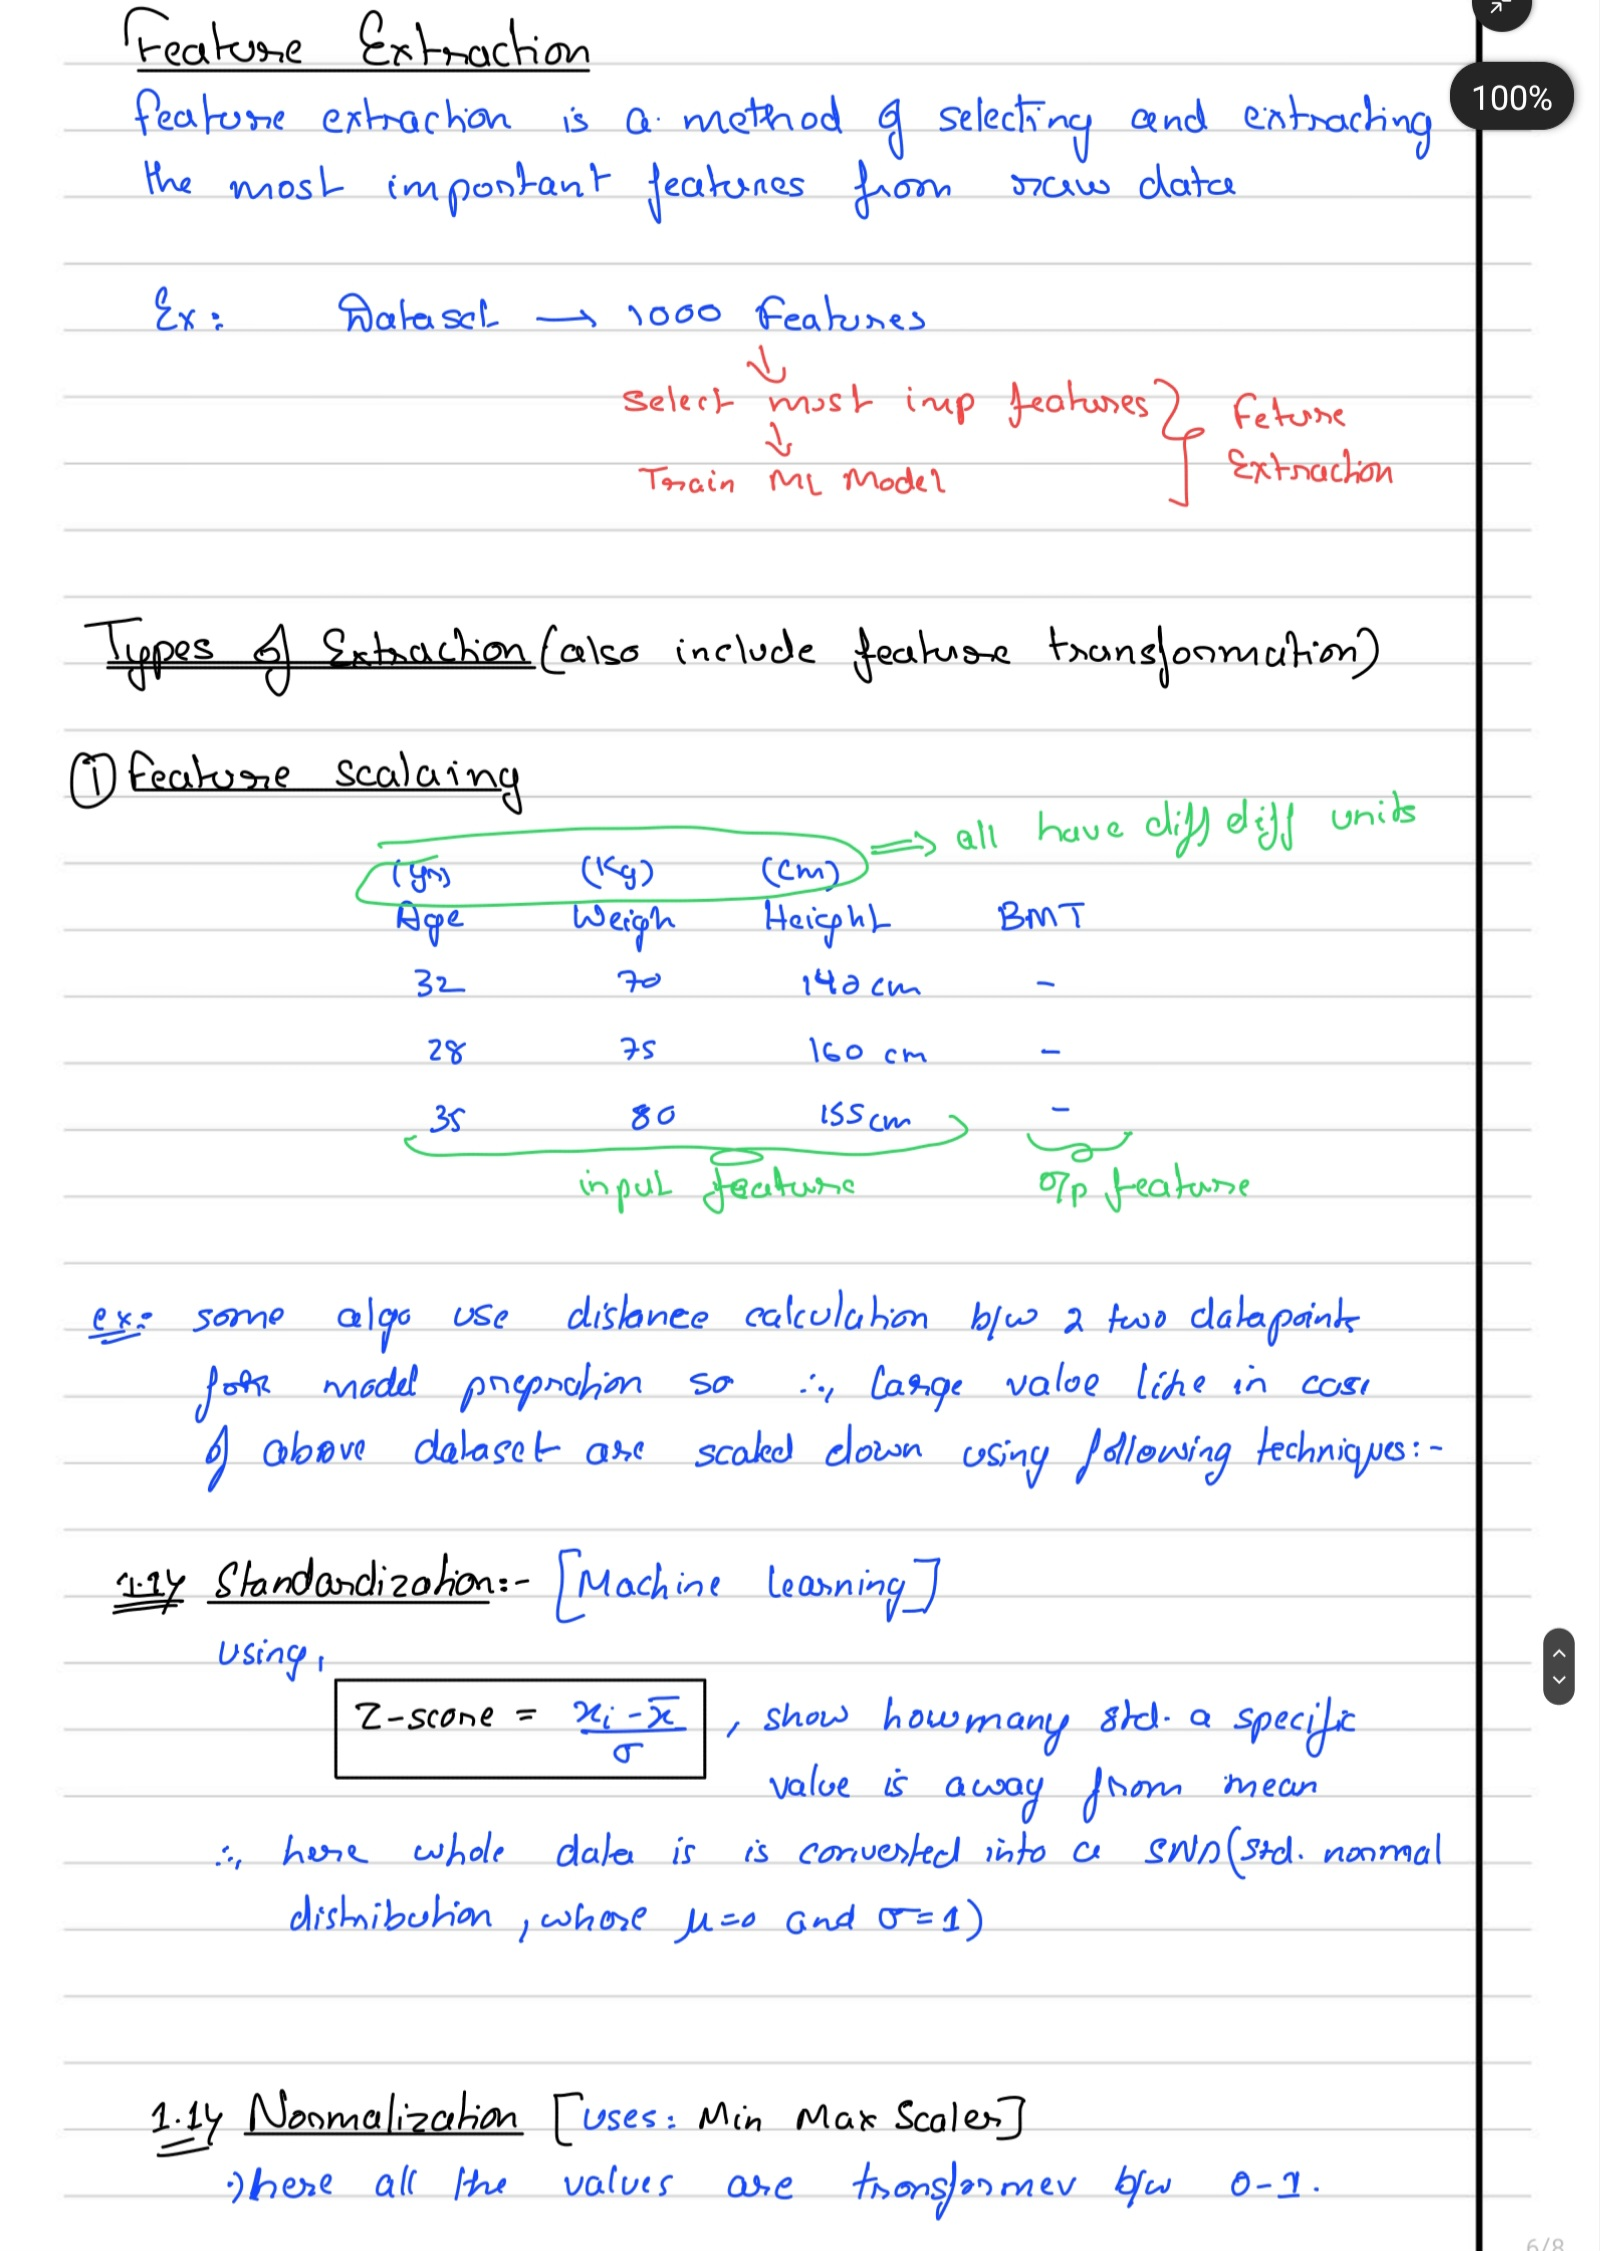

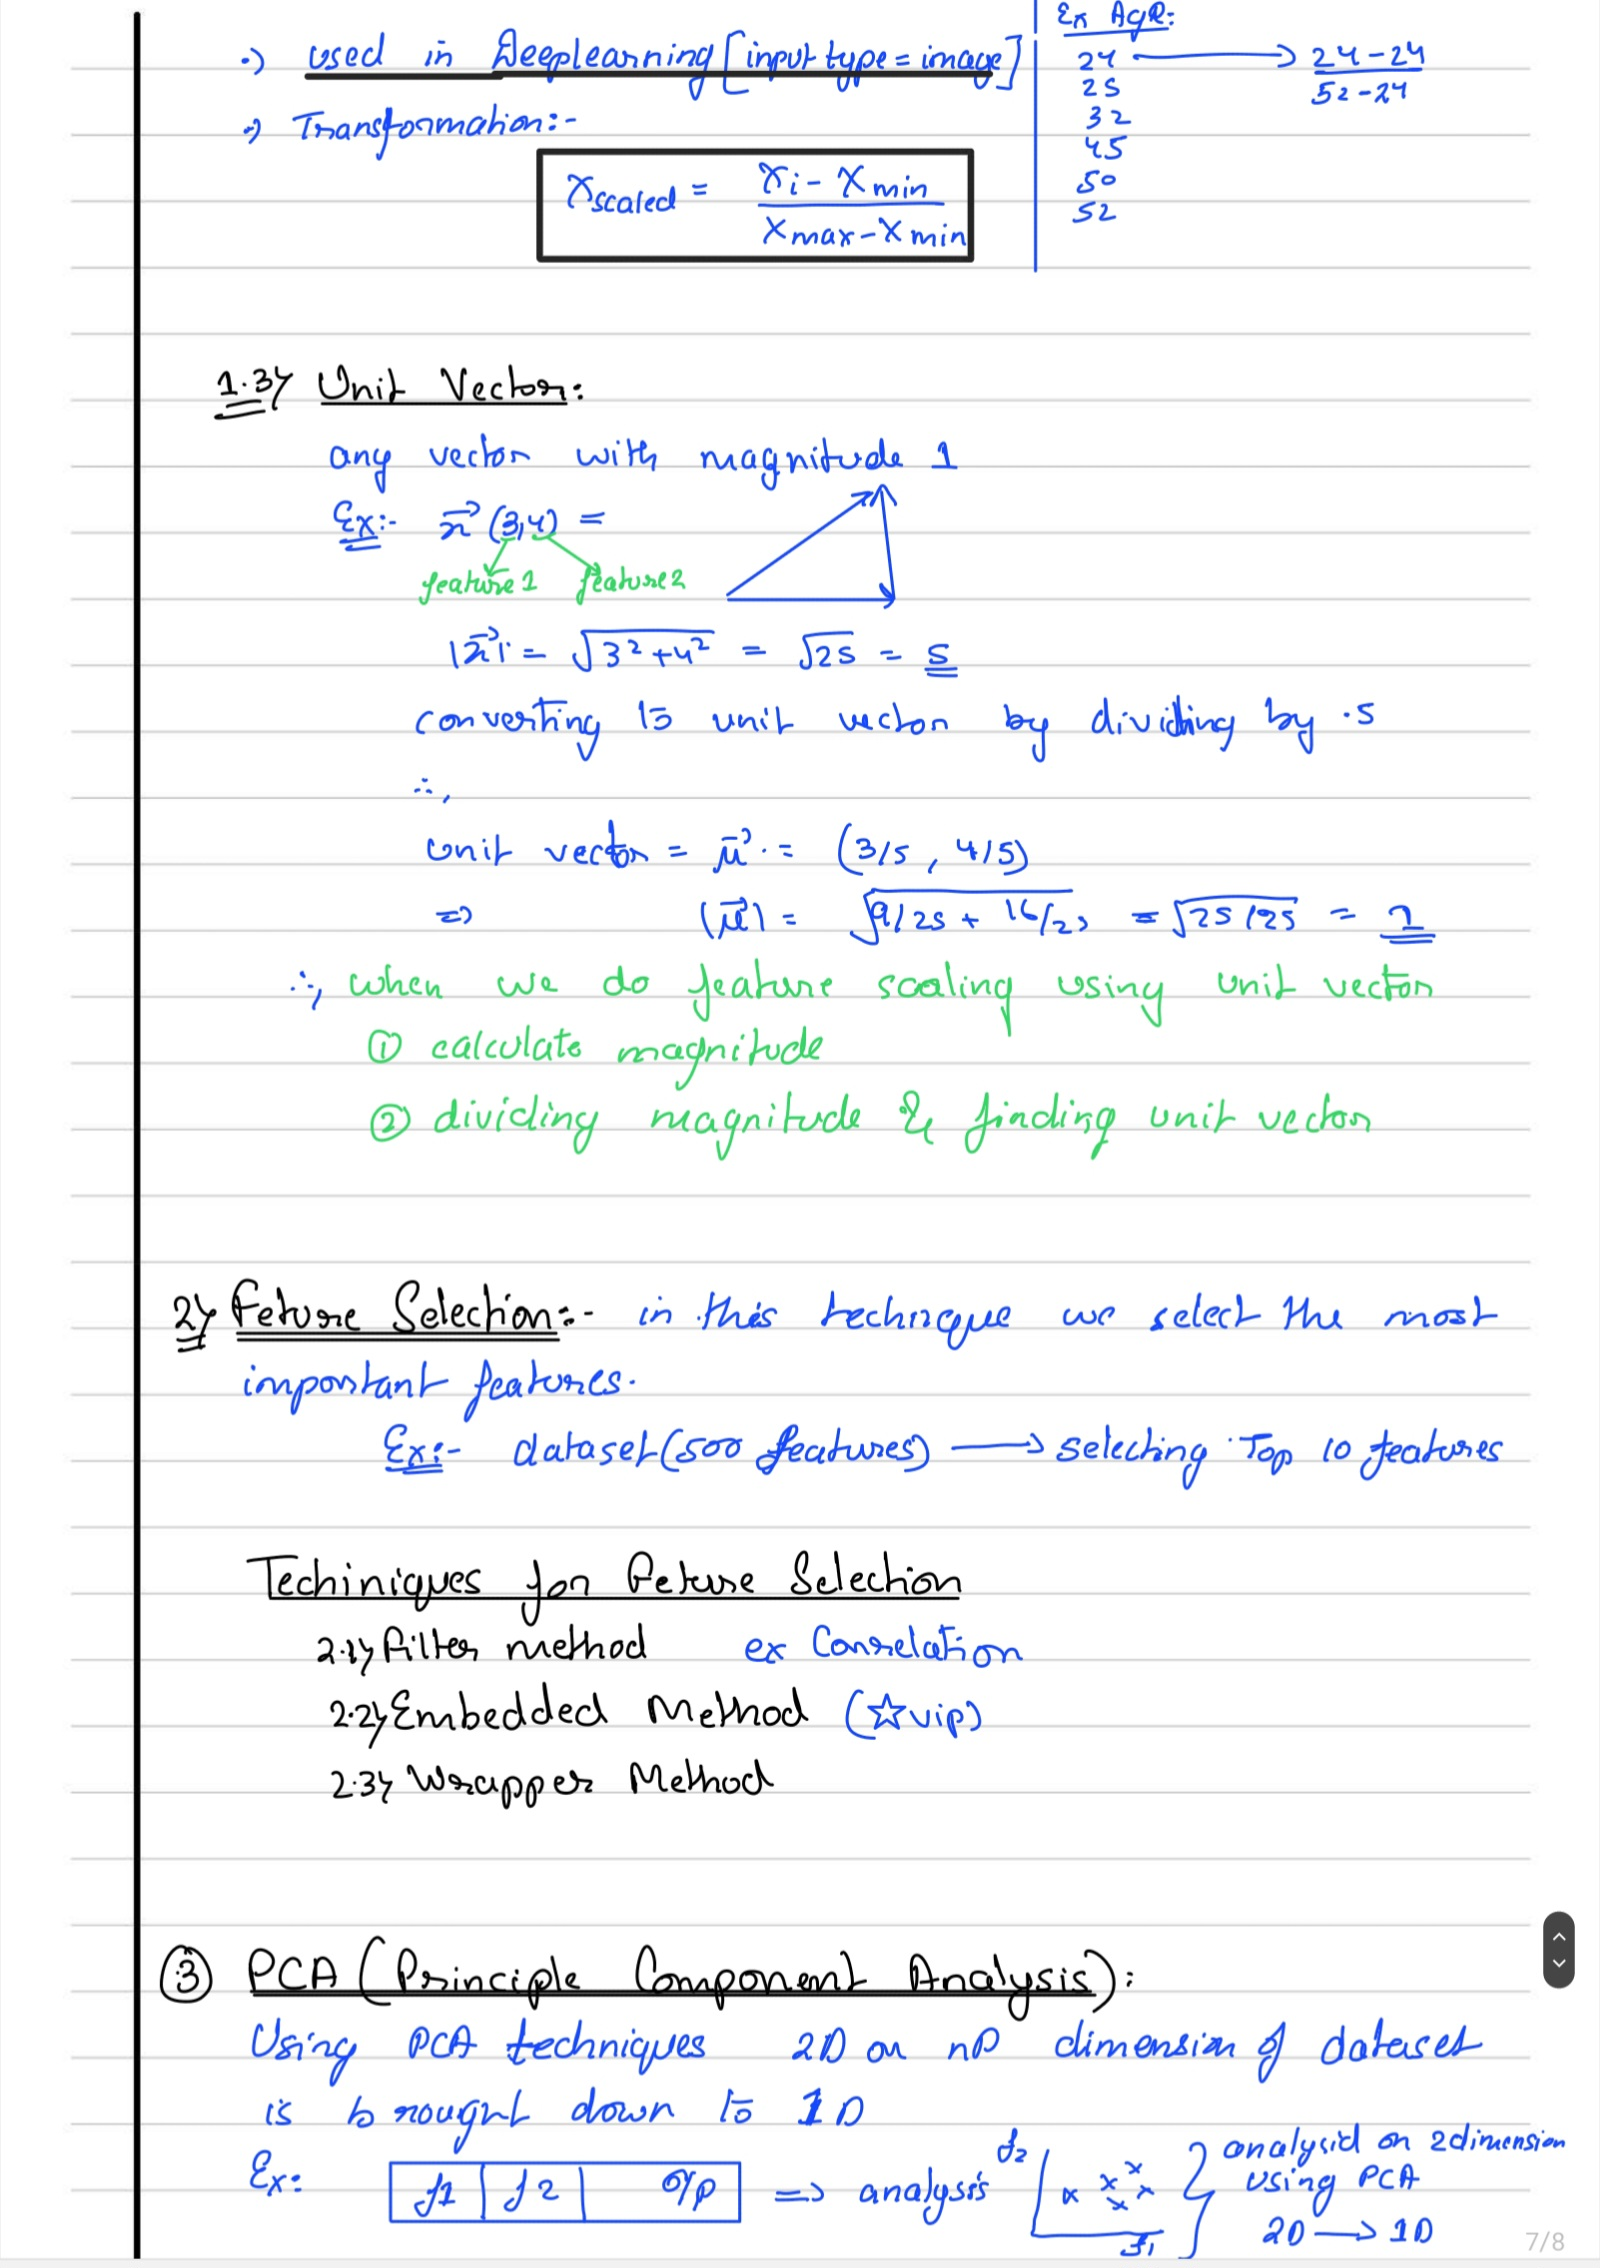

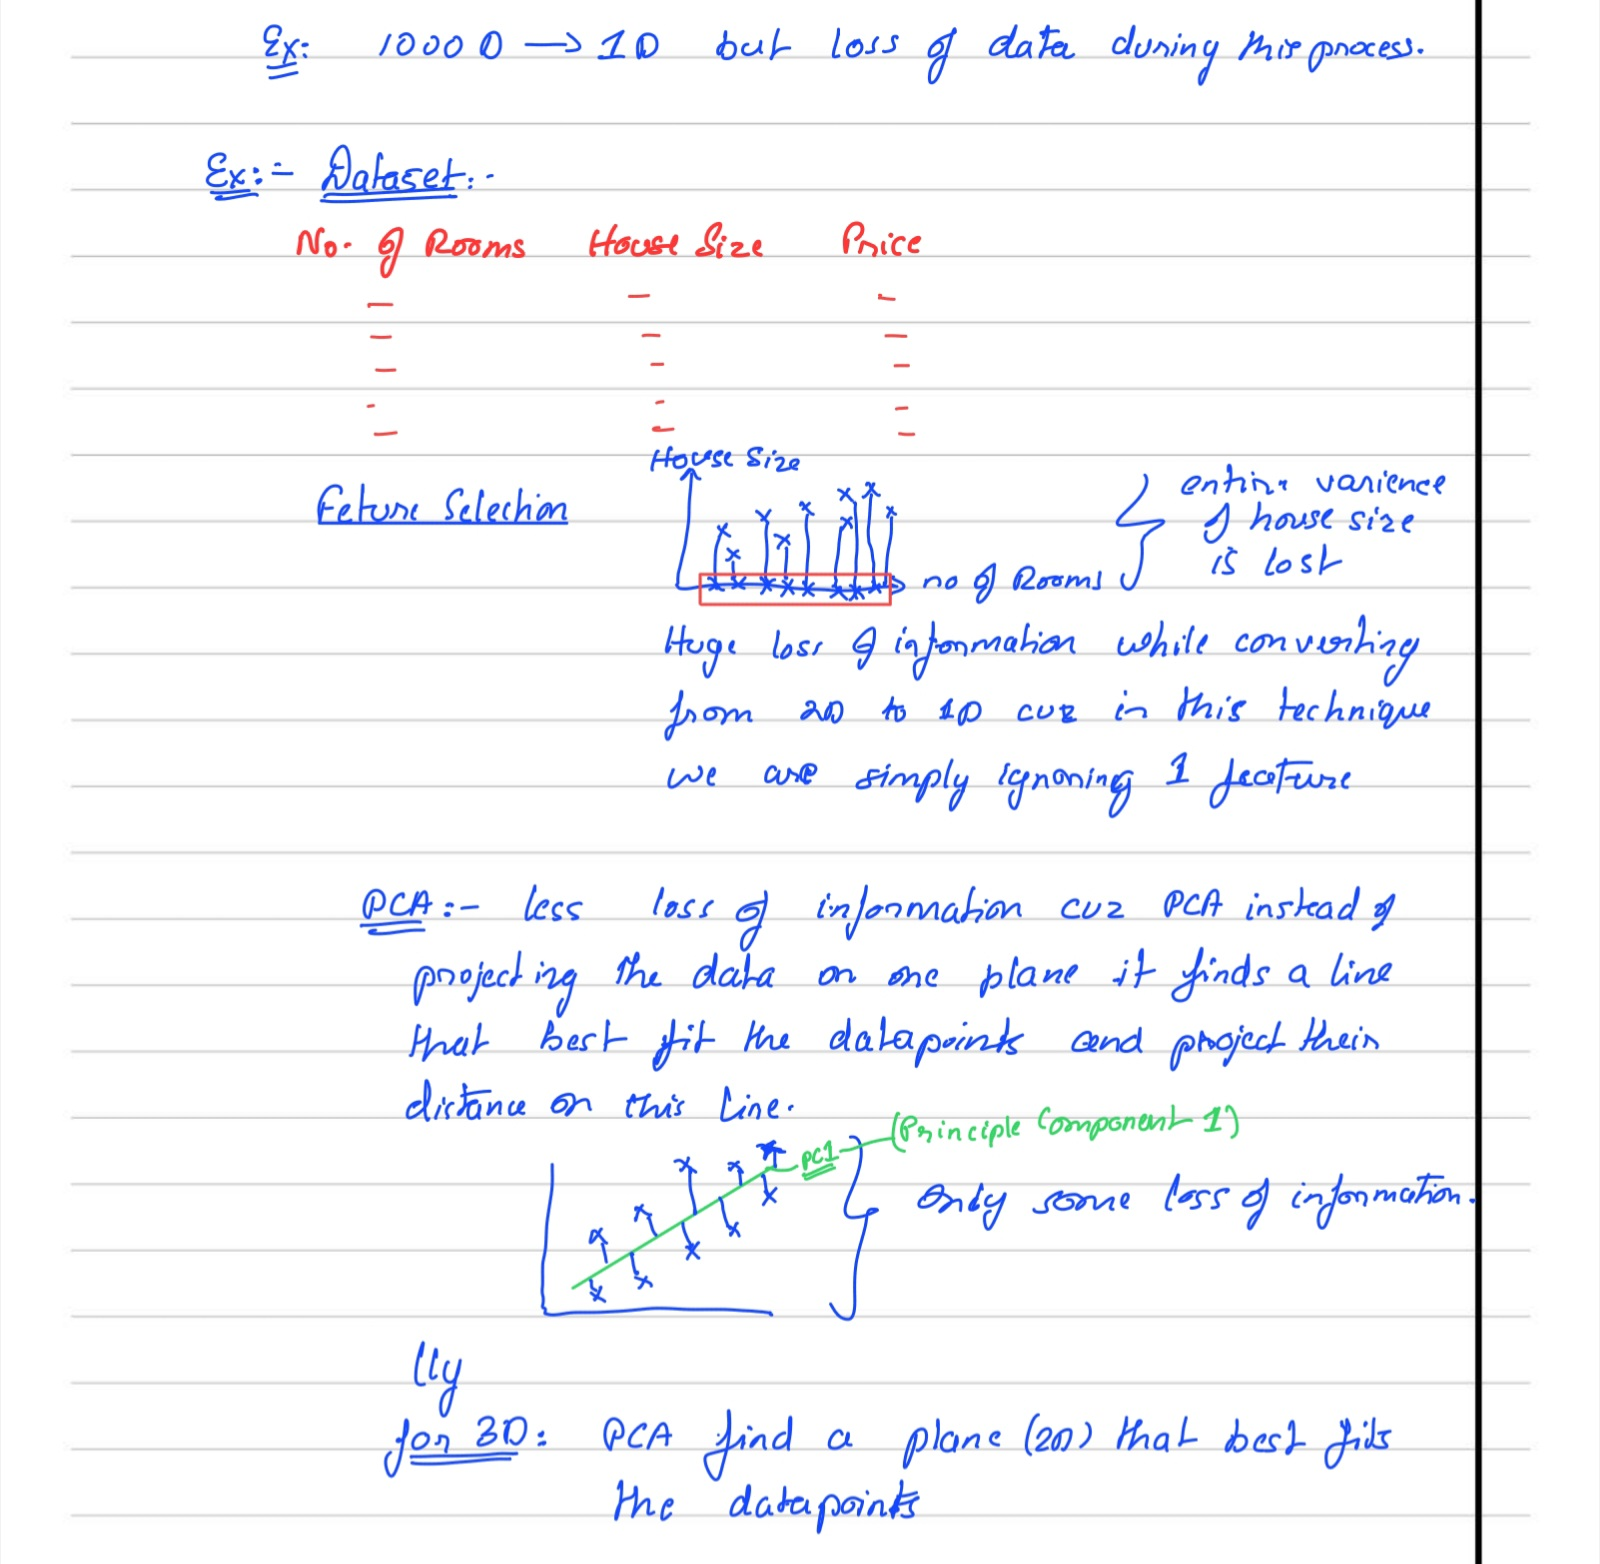

###### **Note: Feature Seection will be done after learning regression.
Add assignment here after that

## 6.1 Feature Scaling Techniques:
1. Standardization
2. Min-Max Scalar
3. Unit Vector

### 6.1.1- Standardization

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd

df_tips = sns.load_dataset('tips')
df_tips.head()

#applying standardization to total_bill feature:
mean = np.mean(df_tips['total_bill'])
std = np.std(df_tips['total_bill'])

standardized_data_list = []
for i in list(df_tips['total_bill']):
    z_score = (i-mean)/std
    standardized_data_list.append(z_score)
# sns.histplot(df_tips['total_bill'],kde=True)
# sns.histplot(standardized_data_list)

df_standardized = pd.DataFrame(standardized_data_list)
df_tips['total_bill'] = df_standardized
df_tips.tail()

total_bill   tip     sex smoker   day    time  size
239    1.040511  5.92    Male     No   Sat  Dinner     3
240    0.832275  2.00  Female    Yes   Sat  Dinner     2
241    0.324630  2.00    Male    Yes   Sat  Dinner     2
242   -0.221287  1.75    Male     No   Sat  Dinner     2
243   -0.113229  3.00  Female     No  Thur  Dinner     2

In [32]:
#using scikit library for doing the same
from sklearn.preprocessing import StandardScaler

#
df = sns.load_dataset('tips')

#creating an object for StandardScaler
scaler_obj = StandardScaler()
scaler_obj.fit(df[['total_bill','tip']]) #computes the mean and standard deviation required
pd.DataFrame(scaler_obj.transform(df[['total_bill','tip']]),columns=['total_bill','tip']) #finally applies the fit to all the datapoints and prints the result

total_bill       tip
0     -0.314711 -1.439947
1     -1.063235 -0.969205
2      0.137780  0.363356
3      0.438315  0.225754
4      0.540745  0.443020
..          ...       ...
239    1.040511  2.115963
240    0.832275 -0.722971
241    0.324630 -0.722971
242   -0.221287 -0.904026
243   -0.113229  0.001247

[244 rows x 2 columns]

In [31]:
#using fit_transform method
pd.DataFrame(scaler_obj.fit_transform(df[['total_bill','tip']]),columns=['total_bill','tip'])
#this mehtods applies fit and transform the data in a single method no need of seperate mehtods

total_bill       tip
0     -0.314711 -1.439947
1     -1.063235 -0.969205
2      0.137780  0.363356
3      0.438315  0.225754
4      0.540745  0.443020
..          ...       ...
239    1.040511  2.115963
240    0.832275 -0.722971
241    0.324630 -0.722971
242   -0.221287 -0.904026
243   -0.113229  0.001247

[244 rows x 2 columns]

In [33]:
#Now as the fit is fix is computed therefore for any new data simply apply transfor for the solution
scaler_obj.transform([[13,4]]) #new total_bill and tip data

/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

### 6.1.2- Min-Max Scalar(Normalization) between 0-1
**used in machine learning algorithms that are <u>sensitive to the scale of the features</u>, such as k-nearest neighbors (KNN) and support vector machines (SVM).**

In [39]:
from sklearn.preprocessing import MinMaxScaler
df = sns.load_dataset('taxis')
df.head()

#creating object
min_max = MinMaxScaler()
pd.DataFrame(min_max.fit_transform(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

distance      fare       tip
0     0.043597  0.040268  0.064759
1     0.021526  0.026846  0.000000
2     0.037330  0.043624  0.071084
3     0.209809  0.174497  0.185241
4     0.058856  0.053691  0.033133
...        ...       ...       ...
6428  0.020436  0.023490  0.031928
6429  0.510627  0.382550  0.000000
6430  0.112807  0.100671  0.000000
6431  0.030518  0.033557  0.000000
6432  0.104905  0.093960  0.101205

[6433 rows x 3 columns]

In [37]:
#for any new data just apply transform
min_max.transform([[1.6,7.0,2.15]])

/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

### 6.1.3 Unit Vector
**used in machine learning algorithms that are <u>sensitive to the magnitude of the features</u>, such as principal component analysis (PCA) and linear discriminant analysis (LDA).**

In [40]:
from sklearn.preprocessing import normalize #not a class therefore no need to create an object

pd.DataFrame(normalize(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

distance      fare       tip
0     0.213461  0.933894  0.286839
1     0.156064  0.987747  0.000000
2     0.171657  0.939731  0.295702
3     0.267899  0.939386  0.213971
4     0.231742  0.965592  0.118017
...        ...       ...       ...
6428  0.160133  0.960800  0.226322
6429  0.307453  0.951563  0.000000
6430  0.250500  0.968117  0.000000
6431  0.183497  0.983020  0.000000
6432  0.242956  0.946580  0.212034

[6433 rows x 3 columns]

<a href="../Assignments/19_March_Feature_Engineering_3.ipynb">Assignment-3</a>

# -------------------------------------------------------------------------------------------------------------

# 7)- Data Encoding
1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

## 7.1 Nominal/OHE Encoding
One hot encoding(OHE), also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]
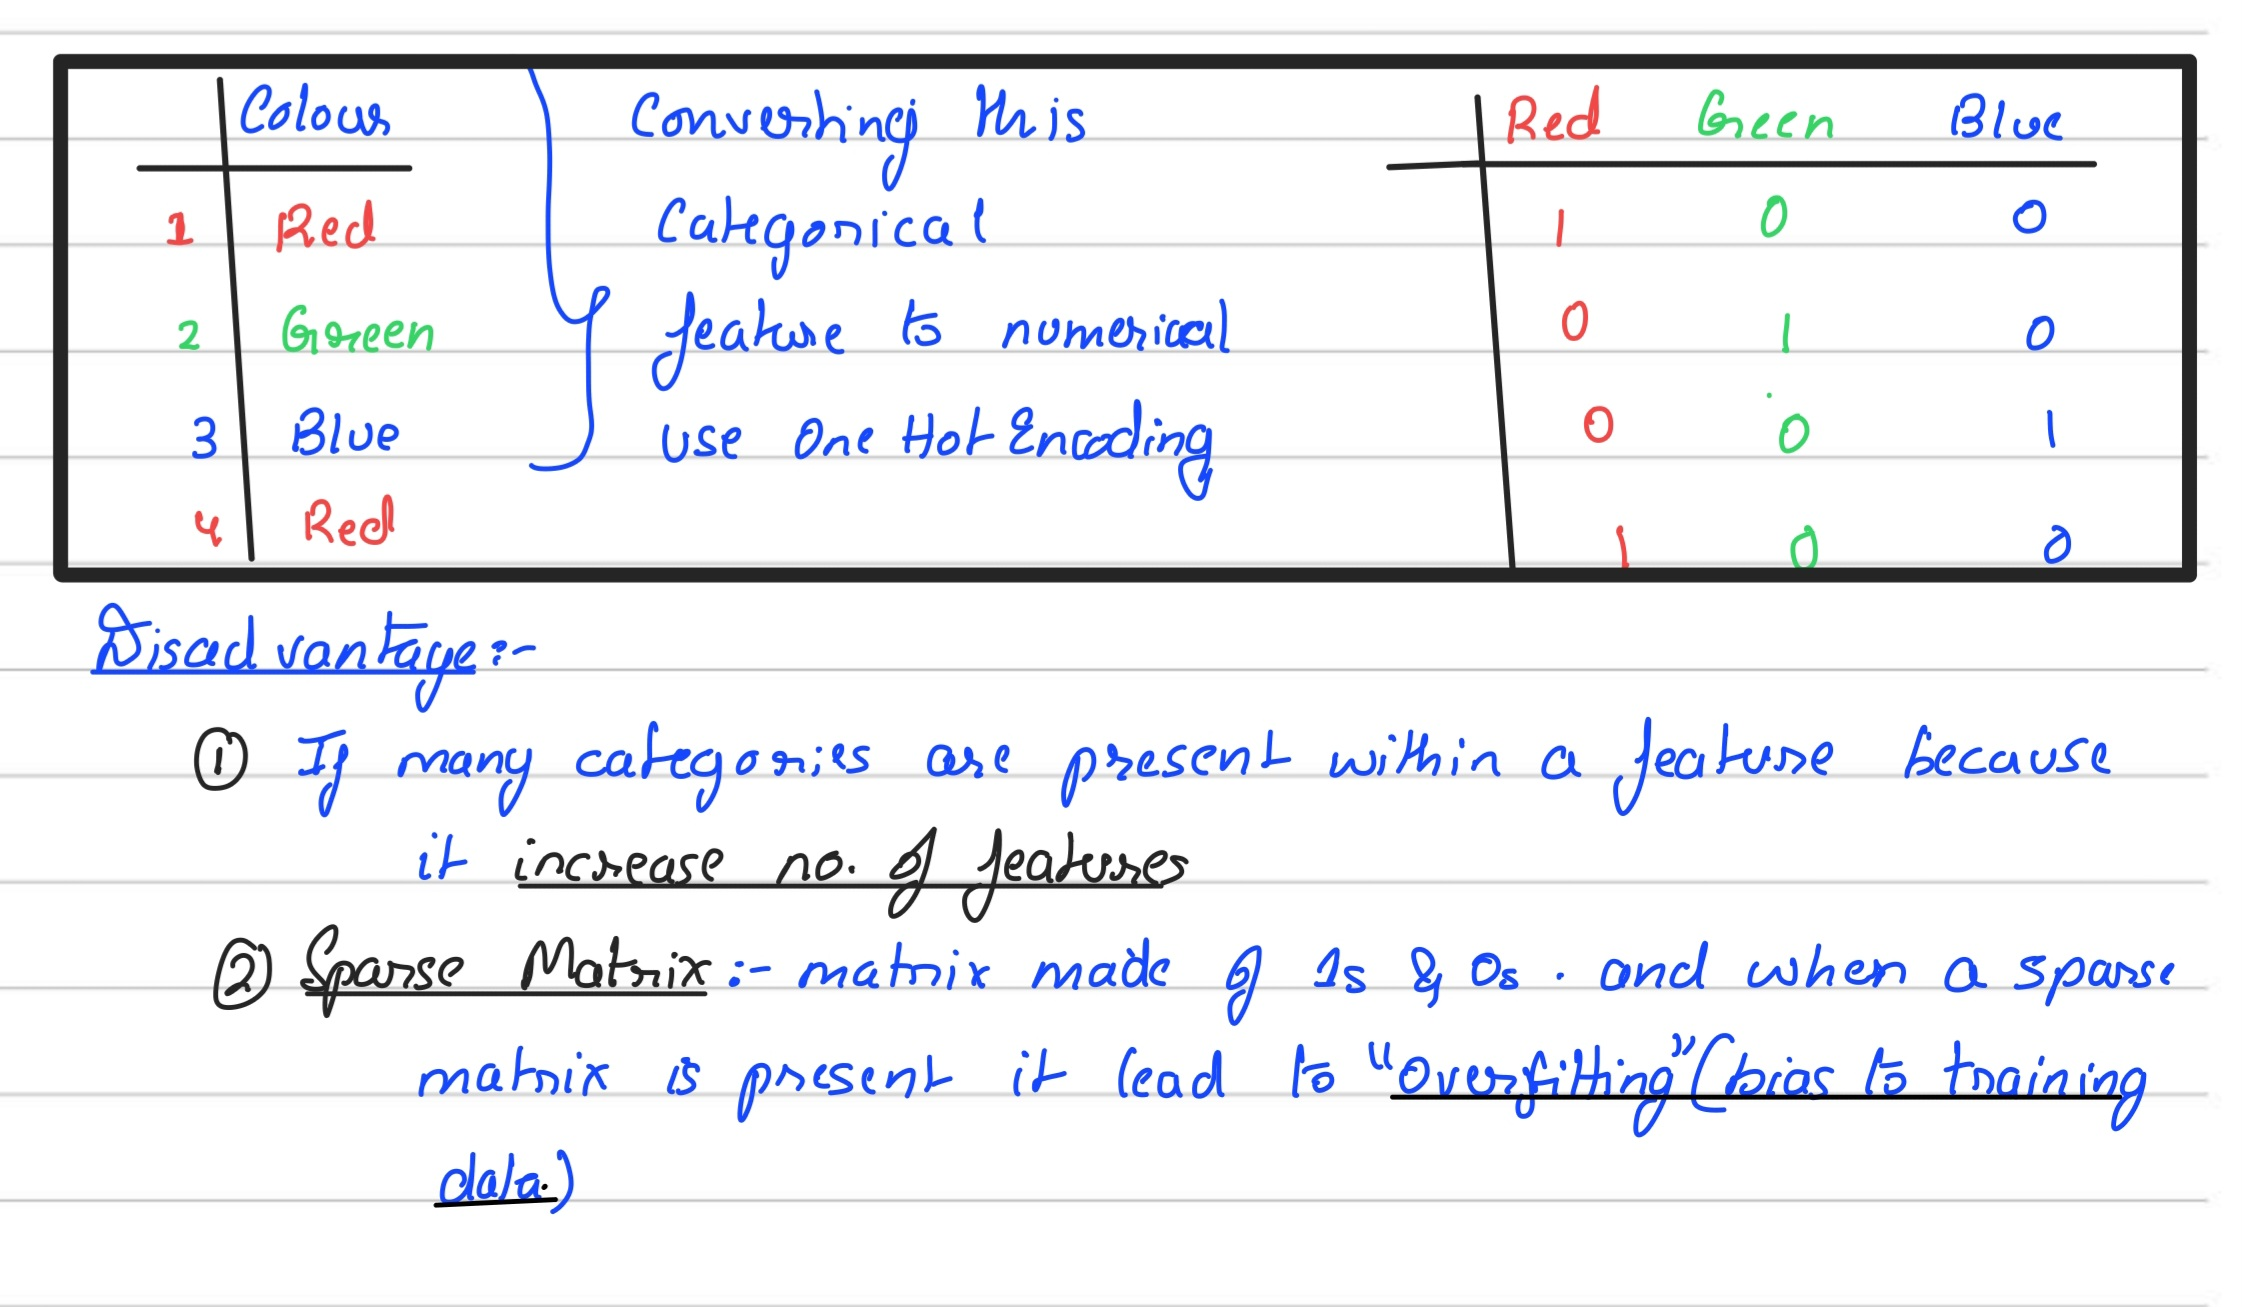

### Q3. In what situations is nominal encoding preferred over one-hot encoding? Provide a practical example.

Nominal encoding is preferred over one-hot encoding in situations where the order of the categories does not matter. For example, if you have a categorical feature that represents the color of a car, such as "red," "green," and "blue," then nominal encoding would be the preferred encoding technique. This is because the order of the colors does not matter.

One-hot encoding, on the other hand, is preferred in situations where the order of the categories does matter. For example, if you have a categorical feature that represents the day of the week, such as "Monday," "Tuesday," "Wednesday," "Thursday," "Friday," "Saturday," and "Sunday," then one-hot encoding would be the preferred encoding technique. This is because the order of the days of the week does matter.

In [145]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#creating simple dataframe
df = pd.DataFrame({
    'color':['red', 'blue', 'green', 'green', 'red', 'blue']
})
df.head()

#creating instance of OHE
ohe_obj = OneHotEncoder()
encoded_array = ohe_obj.fit_transform(df[['color']]).toarray()

#creating dataframe
encoded_df = pd.DataFrame(encoded_array,columns=ohe_obj.get_feature_names_out())
encoded_df.head()

#concatinating to main df
pd.concat([df,encoded_df],axis=1)

color  color_blue  color_green  color_red
0    red         0.0          0.0        1.0
1   blue         1.0          0.0        0.0
2  green         0.0          1.0        0.0
3  green         0.0          1.0        0.0
4    red         0.0          0.0        1.0
5   blue         1.0          0.0        0.0

In [83]:
#for new data directly use transform
ohe_obj.transform([['blue']]).toarray()

/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

## 7.2 Label and Ordinal Encoding

### 7.2.1 Label Encoding 
Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3

In [85]:
from sklearn.preprocessing import LabelEncoder

#creating object
lbl_encoder = LabelEncoder()

#fit-tranform
lbl_encoder.fit_transform(df[['color']])
#Dissadvantage: by using Label Encoder the model start to assign ranks to a categories for example highest rank awarded to Red=2

/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [86]:
print(f"Red: {lbl_encoder.transform([['red']])},\nGreen: {lbl_encoder.transform([['green']])},\nBlue: {lbl_encoder.transform([['blue']])}")

Red: [2],
Green: [1],
Blue: [0]


/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### 7.2.2 Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [87]:
#ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

#creating dataframe 
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})
df.head()

#creating object instance of ordinalencode
ordinal_encoder = OrdinalEncoder(categories=[['small','medium','large']])

#fit-transform
ordinal_encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [88]:
print(f"small rank: {ordinal_encoder.transform([['small']])}\nmedium rank: {ordinal_encoder.transform([['medium']])}\nlarge rank: {ordinal_encoder.transform([['large']])}")

small rank: [[0.]]
medium rank: [[1.]]
large rank: [[2.]]


/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/home/asit/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


<a href="../Assignments/20_March_Feature_Engineering_4.ipynb">Assignment-4</a>

## 7.3 Target Guided Ordinal Encoding 
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [90]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})
df

city  price
0  New York    200
1    London    150
2     Paris    300
3     Tokyo    250
4  New York    180
5     Paris    320

In [97]:
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [100]:
df['city_encode'] = df['city'].map(mean_price) #mapping city with dictionary will change all the similar key with value.
df

city  price  city_encode
0  New York    200        190.0
1    London    150        150.0
2     Paris    300        310.0
3     Tokyo    250        250.0
4  New York    180        190.0
5     Paris    320        310.0

###### Internal assignment
convert time categorical data set to numerical using Targeted guided technique(targeting :total_bill)

In [108]:
import seaborn as sns
mean_bill = df.groupby(['time'])['total_bill'].mean().to_dict()
df['time_encode'] = df['time'].map(mean_bill)
df

total_bill   tip     sex smoker   day    time  size time_encode
0         16.99  1.01  Female     No   Sun  Dinner     2   20.797159
1         10.34  1.66    Male     No   Sun  Dinner     3   20.797159
2         21.01  3.50    Male     No   Sun  Dinner     3   20.797159
3         23.68  3.31    Male     No   Sun  Dinner     2   20.797159
4         24.59  3.61  Female     No   Sun  Dinner     4   20.797159
..          ...   ...     ...    ...   ...     ...   ...         ...
239       29.03  5.92    Male     No   Sat  Dinner     3   20.797159
240       27.18  2.00  Female    Yes   Sat  Dinner     2   20.797159
241       22.67  2.00    Male    Yes   Sat  Dinner     2   20.797159
242       17.82  1.75    Male     No   Sat  Dinner     2   20.797159
243       18.78  3.00  Female     No  Thur  Dinner     2   20.797159

[244 rows x 8 columns]

# -------------------------------------------------------------------------------------------------------------

# 8)- Covariance and Correlation

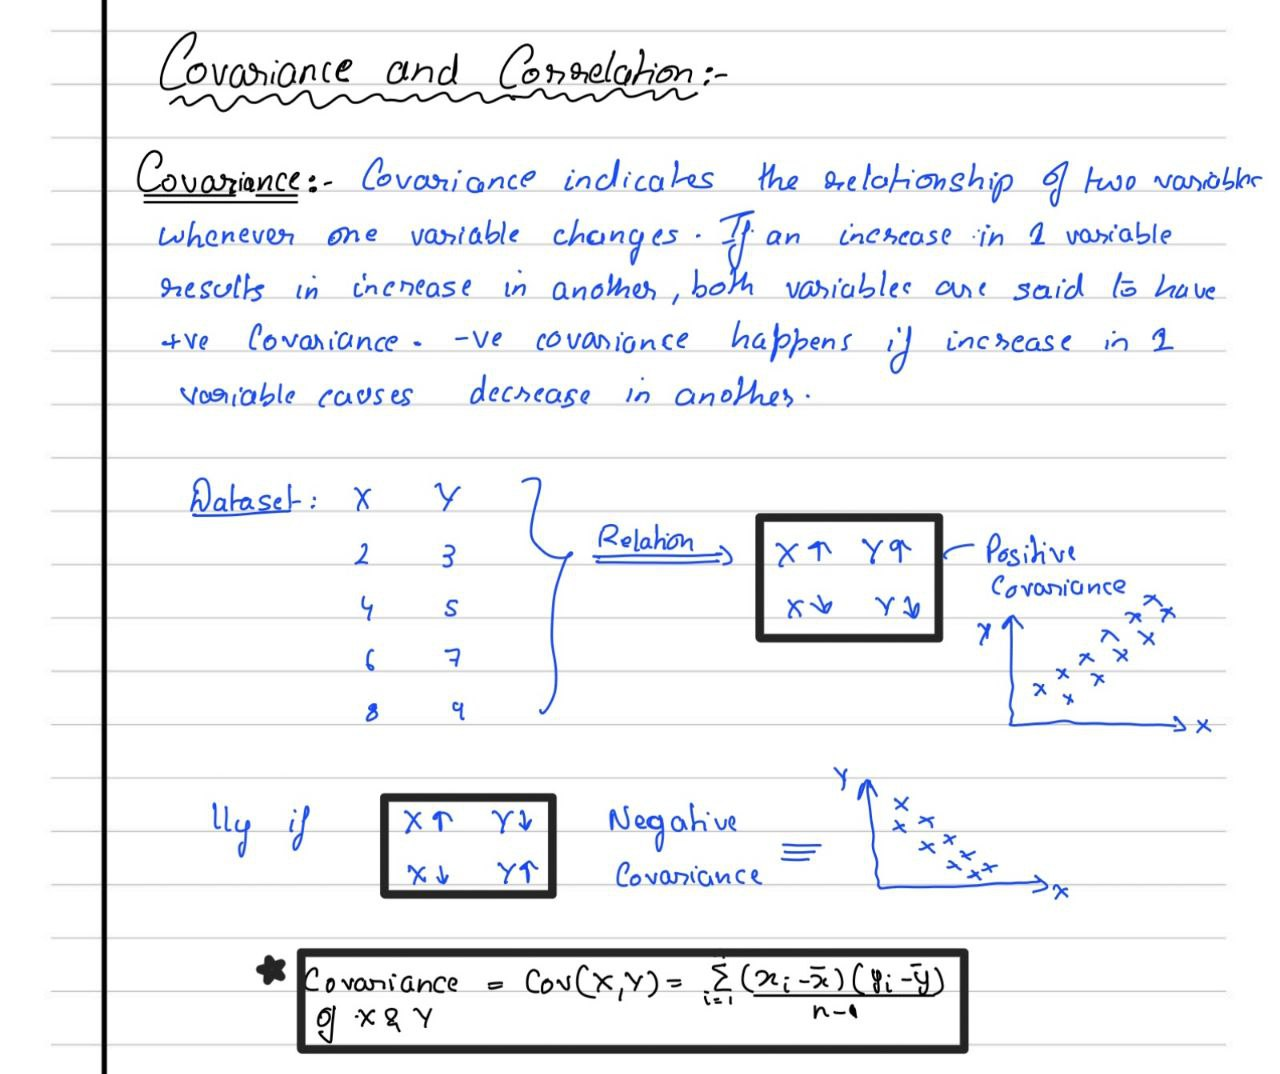

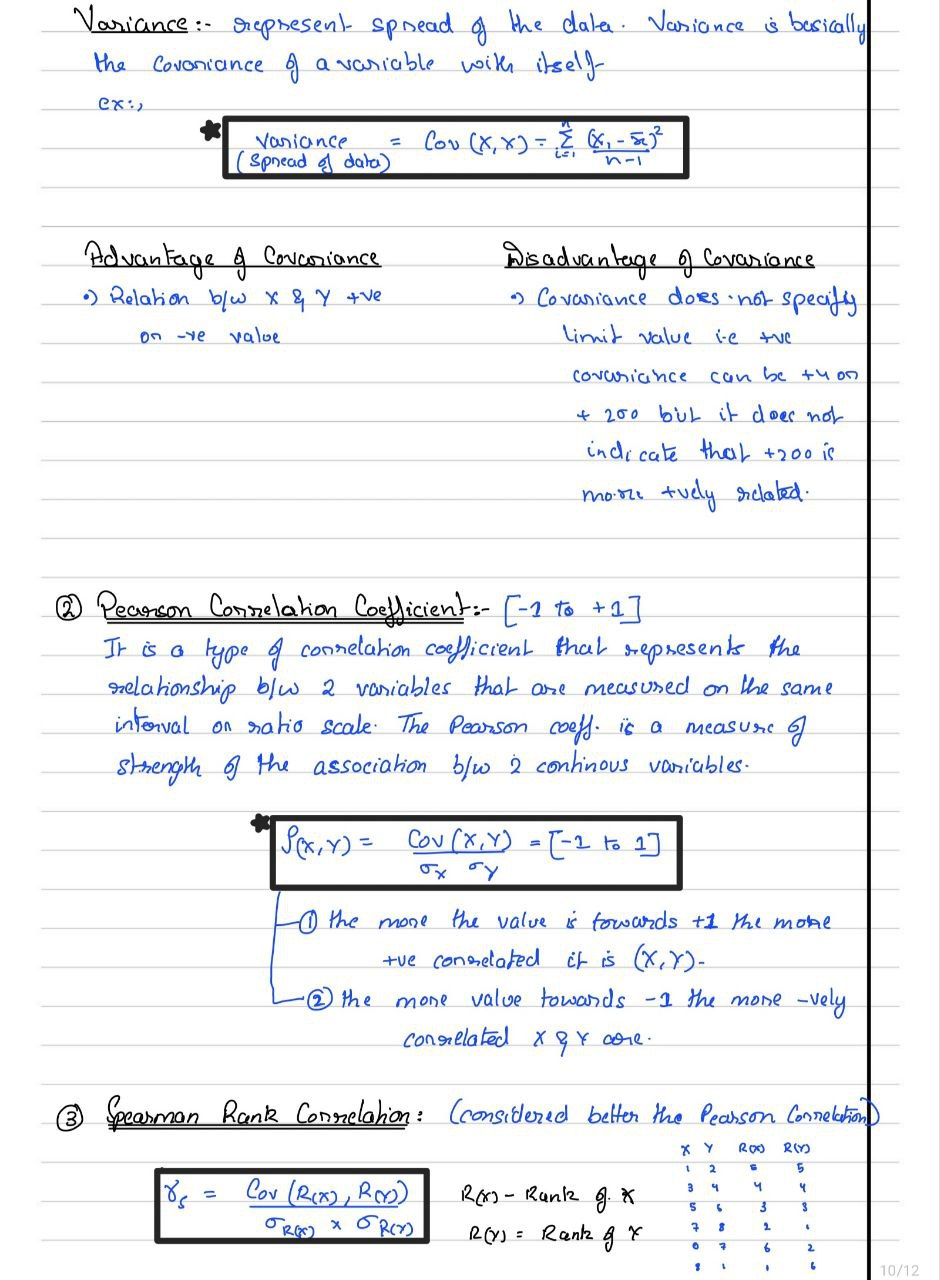

## Covariance and Correlation with Python

In [140]:
import seaborn as sns
import pandas as pd
import numpy as np

#loaad dataset
df=sns.load_dataset('healthexp')
df.head()

##covariance using data set itself
df[df.dtypes[df.dtypes!='object'].index].cov()

Year  Spending_USD  Life_Expectancy
Year               201.098848  2.571883e+04        41.915454
Spending_USD     25718.827373  4.817761e+06      4166.800912
Life_Expectancy     41.915454  4.166801e+03        10.733902

In [142]:
#finding Spearman correlation
df[df.dtypes[df.dtypes!='object'].index].corr(method='spearman')

Year  Spending_USD  Life_Expectancy
Year             1.000000      0.931598         0.896117
Spending_USD     0.931598      1.000000         0.747407
Life_Expectancy  0.896117      0.747407         1.000000

In [144]:
#finding Pearson correlation
df[df.dtypes[df.dtypes!='object'].index].corr(method='pearson')

Year  Spending_USD  Life_Expectancy
Year             1.000000      0.826273         0.902175
Spending_USD     0.826273      1.000000         0.579430
Life_Expectancy  0.902175      0.579430         1.000000